In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
plt.style.use(os.path.join(os.getcwd(), 'default.mplstyle'))

from astropy import constants as const
from astropy import units as u

### utils development

In [2]:
from LWphotorates.utils import nu2lambda, lambda2nu

In [3]:
wavelength_array = np.array([911., 1221.])

In [4]:
frequency_array = lambda2nu(wavelength_array)

In [16]:
nu2lambda(frequency_array.value)

<Quantity [ 911., 1221.] Angstrom>

In [8]:
data_example_path = os.path.join(os.getcwd(), 'inputdata', 'example_spectra', 'exampleSlug.txt')
data_example = np.loadtxt(data_example_path)

age_stars_SEDs = np.logspace(6, 9, 61)
wl_SEDs = data_example[0] * u.angstrom
spectra_SEDs = data_example[1:] * u.erg / u.s / u.angstrom

freq_SEDs = lambda2nu(wl_SEDs)
energy_SEDs = const.h.to(u.eV / u.Hz) * freq_SEDs

In [3]:
from LWphotorates.utils import spec_nu2lambda, spec_lambda2nu

In [25]:
example_spec_wl = spectra_SEDs[0]

example_spec_freq = spec_lambda2nu(wl_SEDs, example_spec_wl)

recalc_example_spec_wl = spec_nu2lambda(freq_SEDs, example_spec_freq)

In [26]:
example_spec_wl

<Quantity [4.91590073e+29, 1.58562218e+30, 3.27275816e+30, ...,
           2.67255190e+28, 2.34019809e+28, 2.16018969e+28] erg / (Angstrom s)>

In [28]:
(recalc_example_spec_wl - example_spec_wl) / example_spec_wl

<Quantity [-1.43145169e-16,  1.77517053e-16, -1.72010863e-16, ...,
            1.64563559e-16,  1.87934796e-16,  0.00000000e+00]>

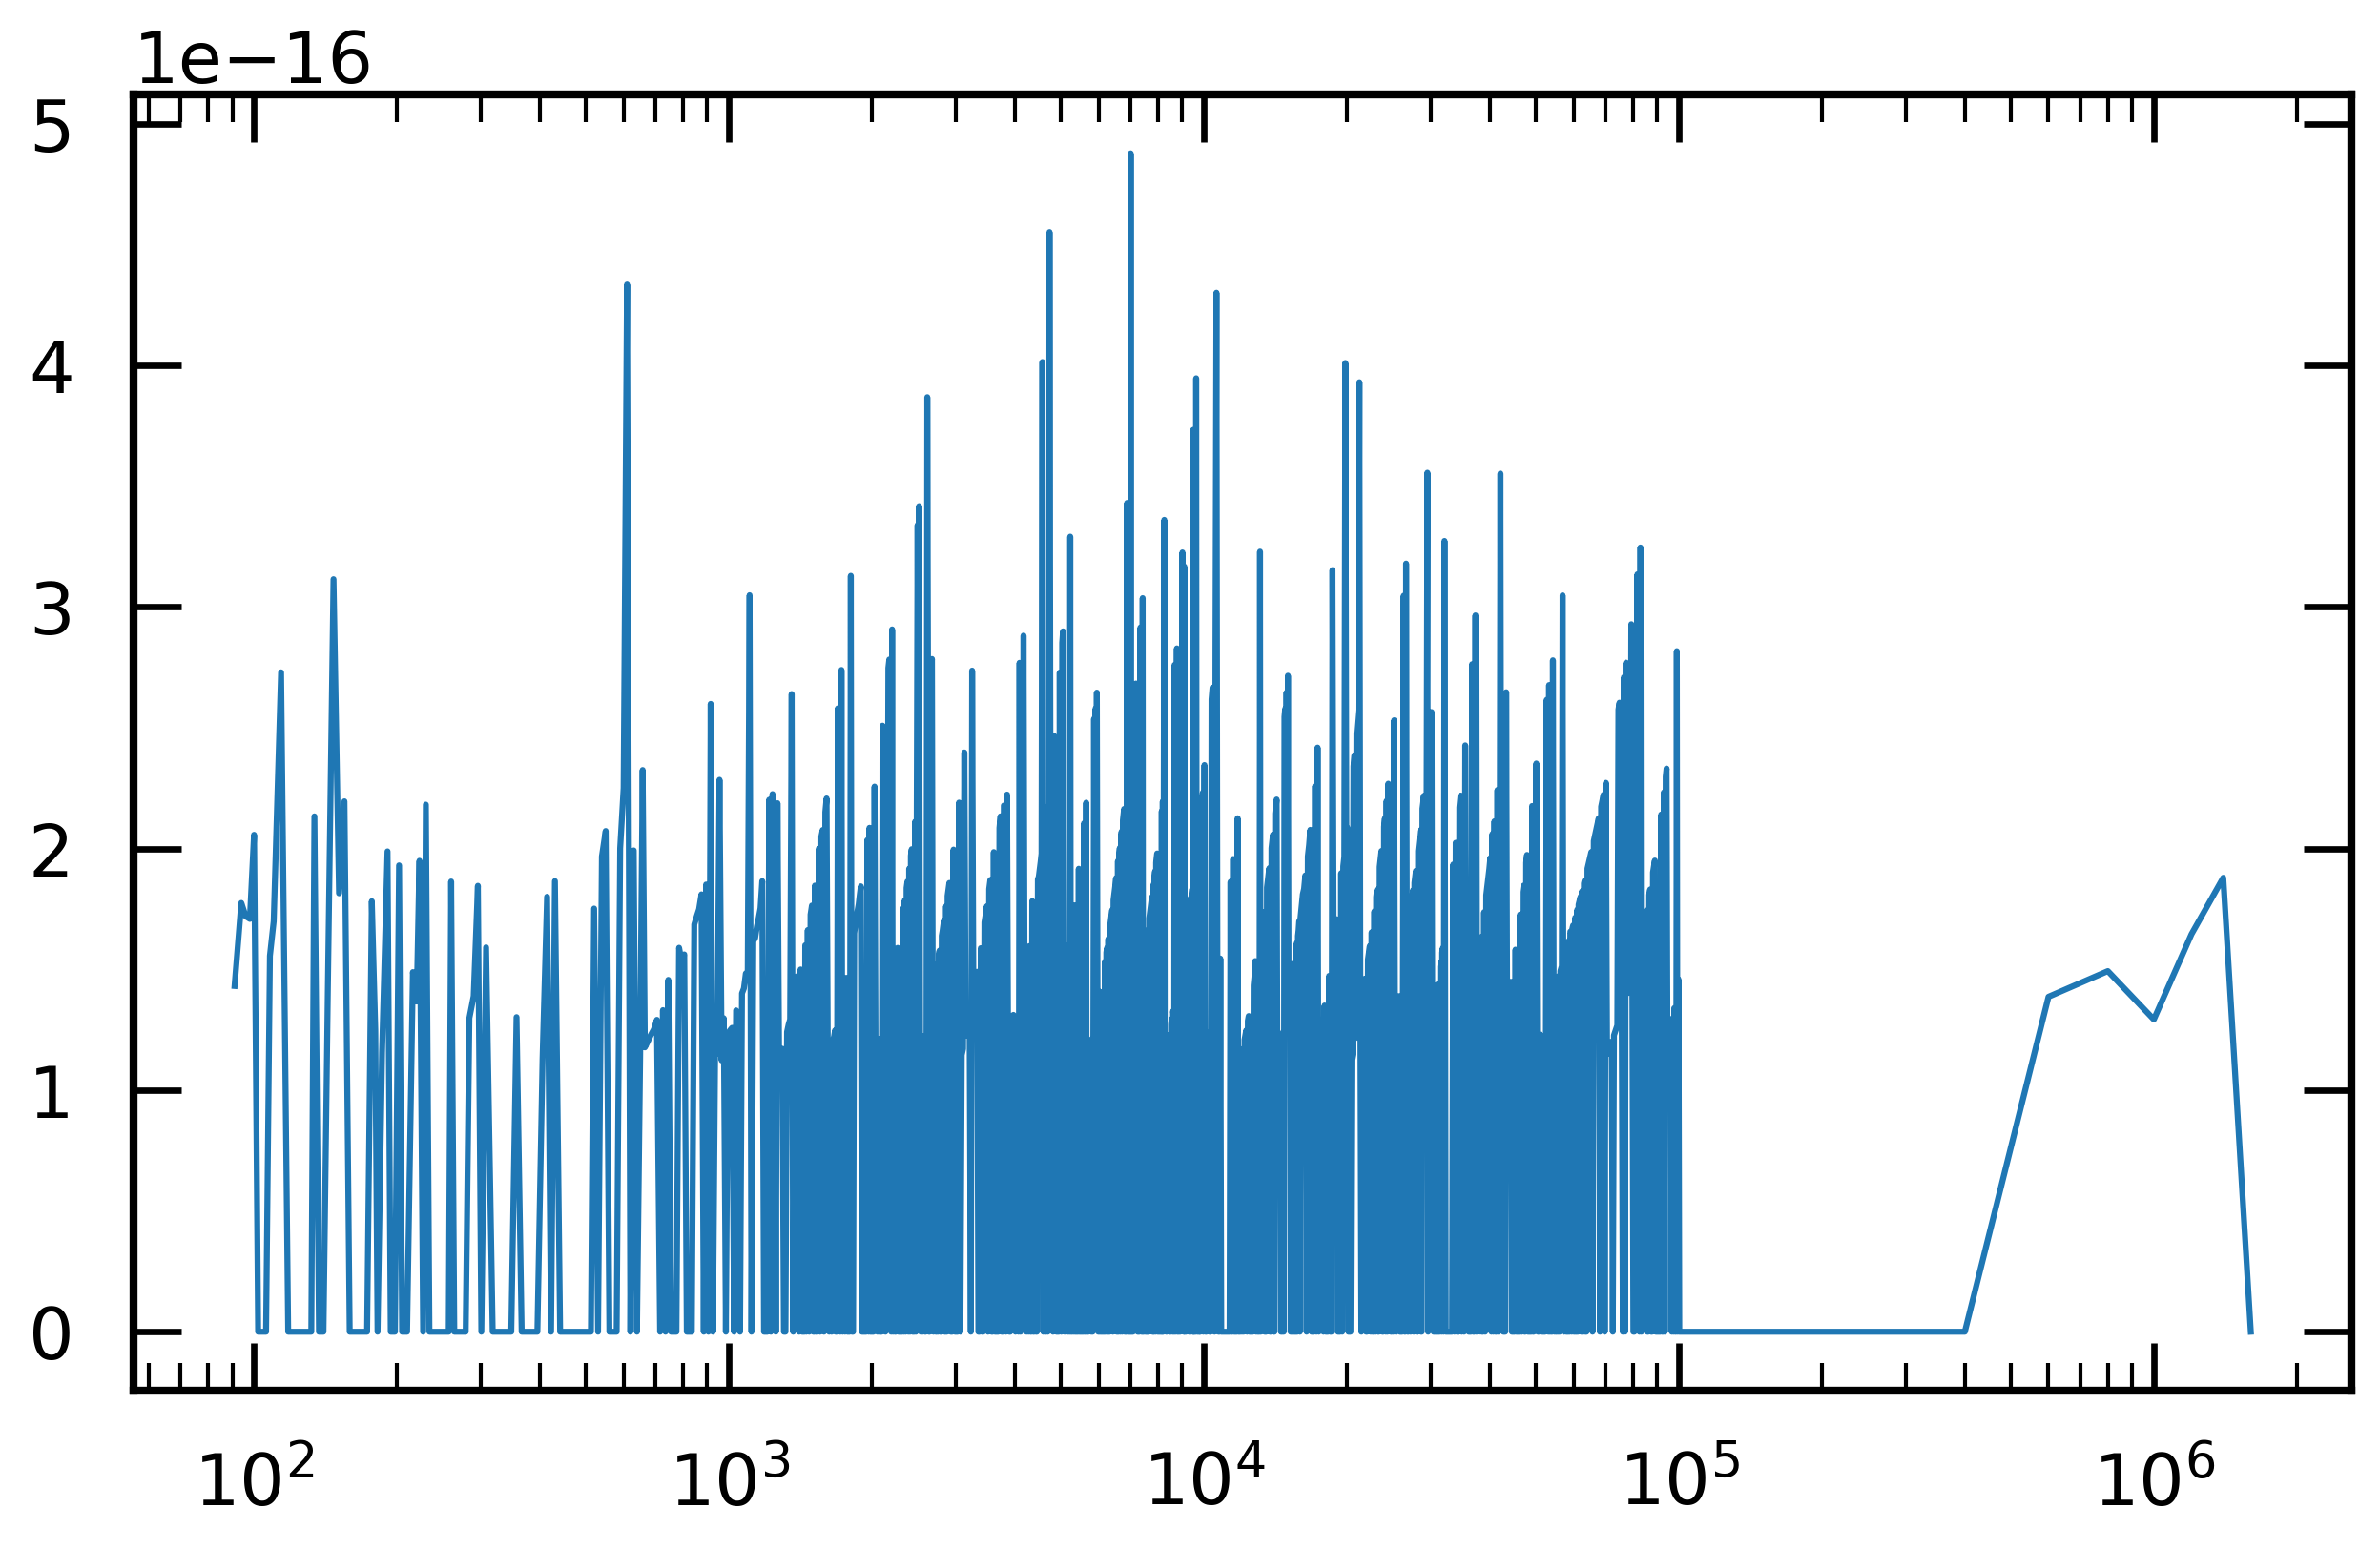

In [31]:
fig, ax = plt.subplots()
ax.plot(wl_SEDs, abs(recalc_example_spec_wl - example_spec_wl) / example_spec_wl)
ax.set_xscale('log')
# ax.set_yscale('log')

In [2]:
from LWphotorates.utils import generate_flat_spectrum

In [4]:
generate_flat_spectrum(spectrum_length=100, normalisation_intensity=2)

<Quantity [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
           2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
           2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
           2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
           2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
           2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
           2., 2., 2., 2.] erg / (cm2 Hz s sr)>

In [19]:
Trad = 1e5 * u.K

frequency_array = lambda2nu(wavelength_array)
energy_array = frequency_array * const.h.to(u.eV / u.Hz)

bb=((2./u.sr*const.h.to(u.erg/u.Hz)*(frequency_array**3)/(const.c.to(u.cm*u.Hz)**2))/(np.exp(energy_array/(const.k_B.to(u.eV/u.K)*Trad))-1.))

In [20]:
bb

<Quantity [0.09704265, 0.13642512] erg / (cm2 sr)>

In [22]:
speed_of_light = (const.c).to(u.cm * u.Hz)
constant_factor = 2. / u.sr * (const.h).to(u.erg * u.s) / speed_of_light**2

constant_factor * frequency_array**3 / (np.exp(energy_array / ((const.k_B).to(u.eV / u.K) * Trad)) - 1.)

In [26]:
constant_factor * frequency_array**3 / (np.exp(energy_array / ((const.k_B).to(u.eV / u.K) * Trad)) - 1.)

<Quantity [0.09704265, 0.13642512] erg Hz s / (cm2 sr)>

In [5]:
from LWphotorates.utils import generate_blackbody_spectrum, spectrum_BB_norm

In [7]:
Trad = 1e5 * u.K

frequency_array = lambda2nu(wavelength_array)
energy_array = frequency_array * const.h.to(u.eV / u.Hz)

In [8]:
spectrum_BB_norm(Trad=Trad, energies=energy_array)

<Quantity [0.71192804, 1.00084724] erg / (cm2 Hz s sr)>

In [9]:
generate_blackbody_spectrum(radiation_temperature=Trad, energy_array=energy_array)

<Quantity [0.71192804, 1.00084724] erg / (cm2 Hz s sr)>

In [10]:
generate_blackbody_spectrum(radiation_temperature=Trad, energy_array=energy_array, normalise_spectrum=True, photon_energy_normalisation=10)

<Quantity [1.02016777, 1.43417878] erg / (cm2 Hz s sr)>

In [12]:
generate_blackbody_spectrum(radiation_temperature=Trad, energy_array=energy_array, normalise_spectrum=False)

<Quantity [0.09704265, 0.13642512] erg / (cm2 Hz s sr)>

In [4]:
from LWphotorates.utils import convert_energy_cm2k, convert_energy_k2cm, convert_energy_cm2ev, convert_energy_ev2cm

In [9]:
convert_energy_cm2ev(1e4)

<Quantity 1.23984198 eV>

In [10]:
convert_energy_ev2cm(1.23984198)

<Quantity 9999.99996506 1 / cm>

In [11]:
energy = 1.23984198 * u.eV

In [15]:
equiv_T = energy / const.k_B.to(u.eV / u.K)

In [16]:
convert_energy_k2cm(equiv_T)

<Quantity 9999.99996506 1 / cm>

### interpolation of spectra

In [2]:
from scipy.interpolate import InterpolatedUnivariateSpline
from LWphotorates.utils import interpolate_array, lambda2nu
from LWphotorates.HM import get_cross_section

In [3]:
data_example_path = os.path.join(os.getcwd(), 'inputdata', 'example_spectra', 'exampleSlug.txt')
data_example = np.loadtxt(data_example_path)

age_stars_SEDs = np.logspace(6, 9, 61)
wl_SEDs = data_example[0] * u.angstrom
spectra_SEDs = data_example[1:] * u.erg / u.s / u.angstrom

freq_SEDs = lambda2nu(wl_SEDs)
energy_SEDs = const.h.to(u.eV / u.Hz) * freq_SEDs

In [4]:
cross_section = get_cross_section()

In [5]:
old_x_axis = freq_SEDs
old_y_axis = spectra_SEDs
new_x_axis = cross_section['frequency']

if old_y_axis.ndim == 1:
    old_y_axis = np.atleast_2d(old_y_axis)
number_of_spectra = old_y_axis.shape[0]

In [6]:
units = old_y_axis.unit
new_y_axis = np.empty(shape=(number_of_spectra, len(new_x_axis)))
for i in range(number_of_spectra):
    interp = InterpolatedUnivariateSpline(old_x_axis, old_y_axis[i].value, k=1)
    new_y_axis[i]=interp(new_x_axis)
new_y_axis = new_y_axis * units

In [7]:
new_y_axis

<Quantity [[4.39743165e+37, 4.39550827e+37, 4.39358489e+37, ...,
            3.48309612e+33, 3.48293841e+33, 3.48276857e+33],
           [4.44920579e+37, 4.44725868e+37, 4.44531157e+37, ...,
            3.52714990e+33, 3.52699076e+33, 3.52681938e+33],
           [4.50774986e+37, 4.50577453e+37, 4.50379920e+37, ...,
            3.57895125e+33, 3.57879045e+33, 3.57861729e+33],
           ...,
           [2.08618015e+36, 2.08586588e+36, 2.08555161e+36, ...,
            1.16047898e+33, 1.16035992e+33, 1.16023171e+33],
           [1.91809868e+36, 1.91785105e+36, 1.91760342e+36, ...,
            1.12838382e+33, 1.12826776e+33, 1.12814277e+33],
           [1.83261919e+36, 1.83247630e+36, 1.83233340e+36, ...,
            1.23423297e+33, 1.23410291e+33, 1.23396284e+33]] erg / (Angstrom s)>

In [8]:
new_y_axis = interpolate_array(
    old_x_axis=old_x_axis,
    old_y_axis=old_y_axis,
    new_x_axis=new_x_axis
)

In [9]:
new_y_axis

<Quantity [[4.39743165e+37, 4.39550827e+37, 4.39358489e+37, ...,
            3.48309612e+33, 3.48293841e+33, 3.48276857e+33],
           [4.44920579e+37, 4.44725868e+37, 4.44531157e+37, ...,
            3.52714990e+33, 3.52699076e+33, 3.52681938e+33],
           [4.50774986e+37, 4.50577453e+37, 4.50379920e+37, ...,
            3.57895125e+33, 3.57879045e+33, 3.57861729e+33],
           ...,
           [2.08618015e+36, 2.08586588e+36, 2.08555161e+36, ...,
            1.16047898e+33, 1.16035992e+33, 1.16023171e+33],
           [1.91809868e+36, 1.91785105e+36, 1.91760342e+36, ...,
            1.12838382e+33, 1.12826776e+33, 1.12814277e+33],
           [1.83261919e+36, 1.83247630e+36, 1.83233340e+36, ...,
            1.23423297e+33, 1.23410291e+33, 1.23396284e+33]] erg / (Angstrom s)>

# HM stuff

In [4]:
from LWphotorates.HM import calc_kHM
from LWphotorates import compute_kHM

In [5]:
new_rates = calc_kHM(wavelength_array=wl_SEDs, spectra_wl=spectra_SEDs, distance=1.*u.kpc)
new_rates_wrapper = compute_kHM(wavelength_array=wl_SEDs, spectra_wl=spectra_SEDs)

In [6]:
import h5py

test_rates_file_path = os.path.join(os.getcwd(), 'inputdata', 'test_rates', 'test_rates_initial_status.h5')
test_rates_file = h5py.File(test_rates_file_path, 'r')
old_rates = test_rates_file['slug/HM'][:]

In [7]:
relative_difference = abs(old_rates - new_rates.value) / old_rates
relative_difference_wrapper = abs(old_rates - new_rates_wrapper.value) / old_rates

In [8]:
test_rates_file.close()

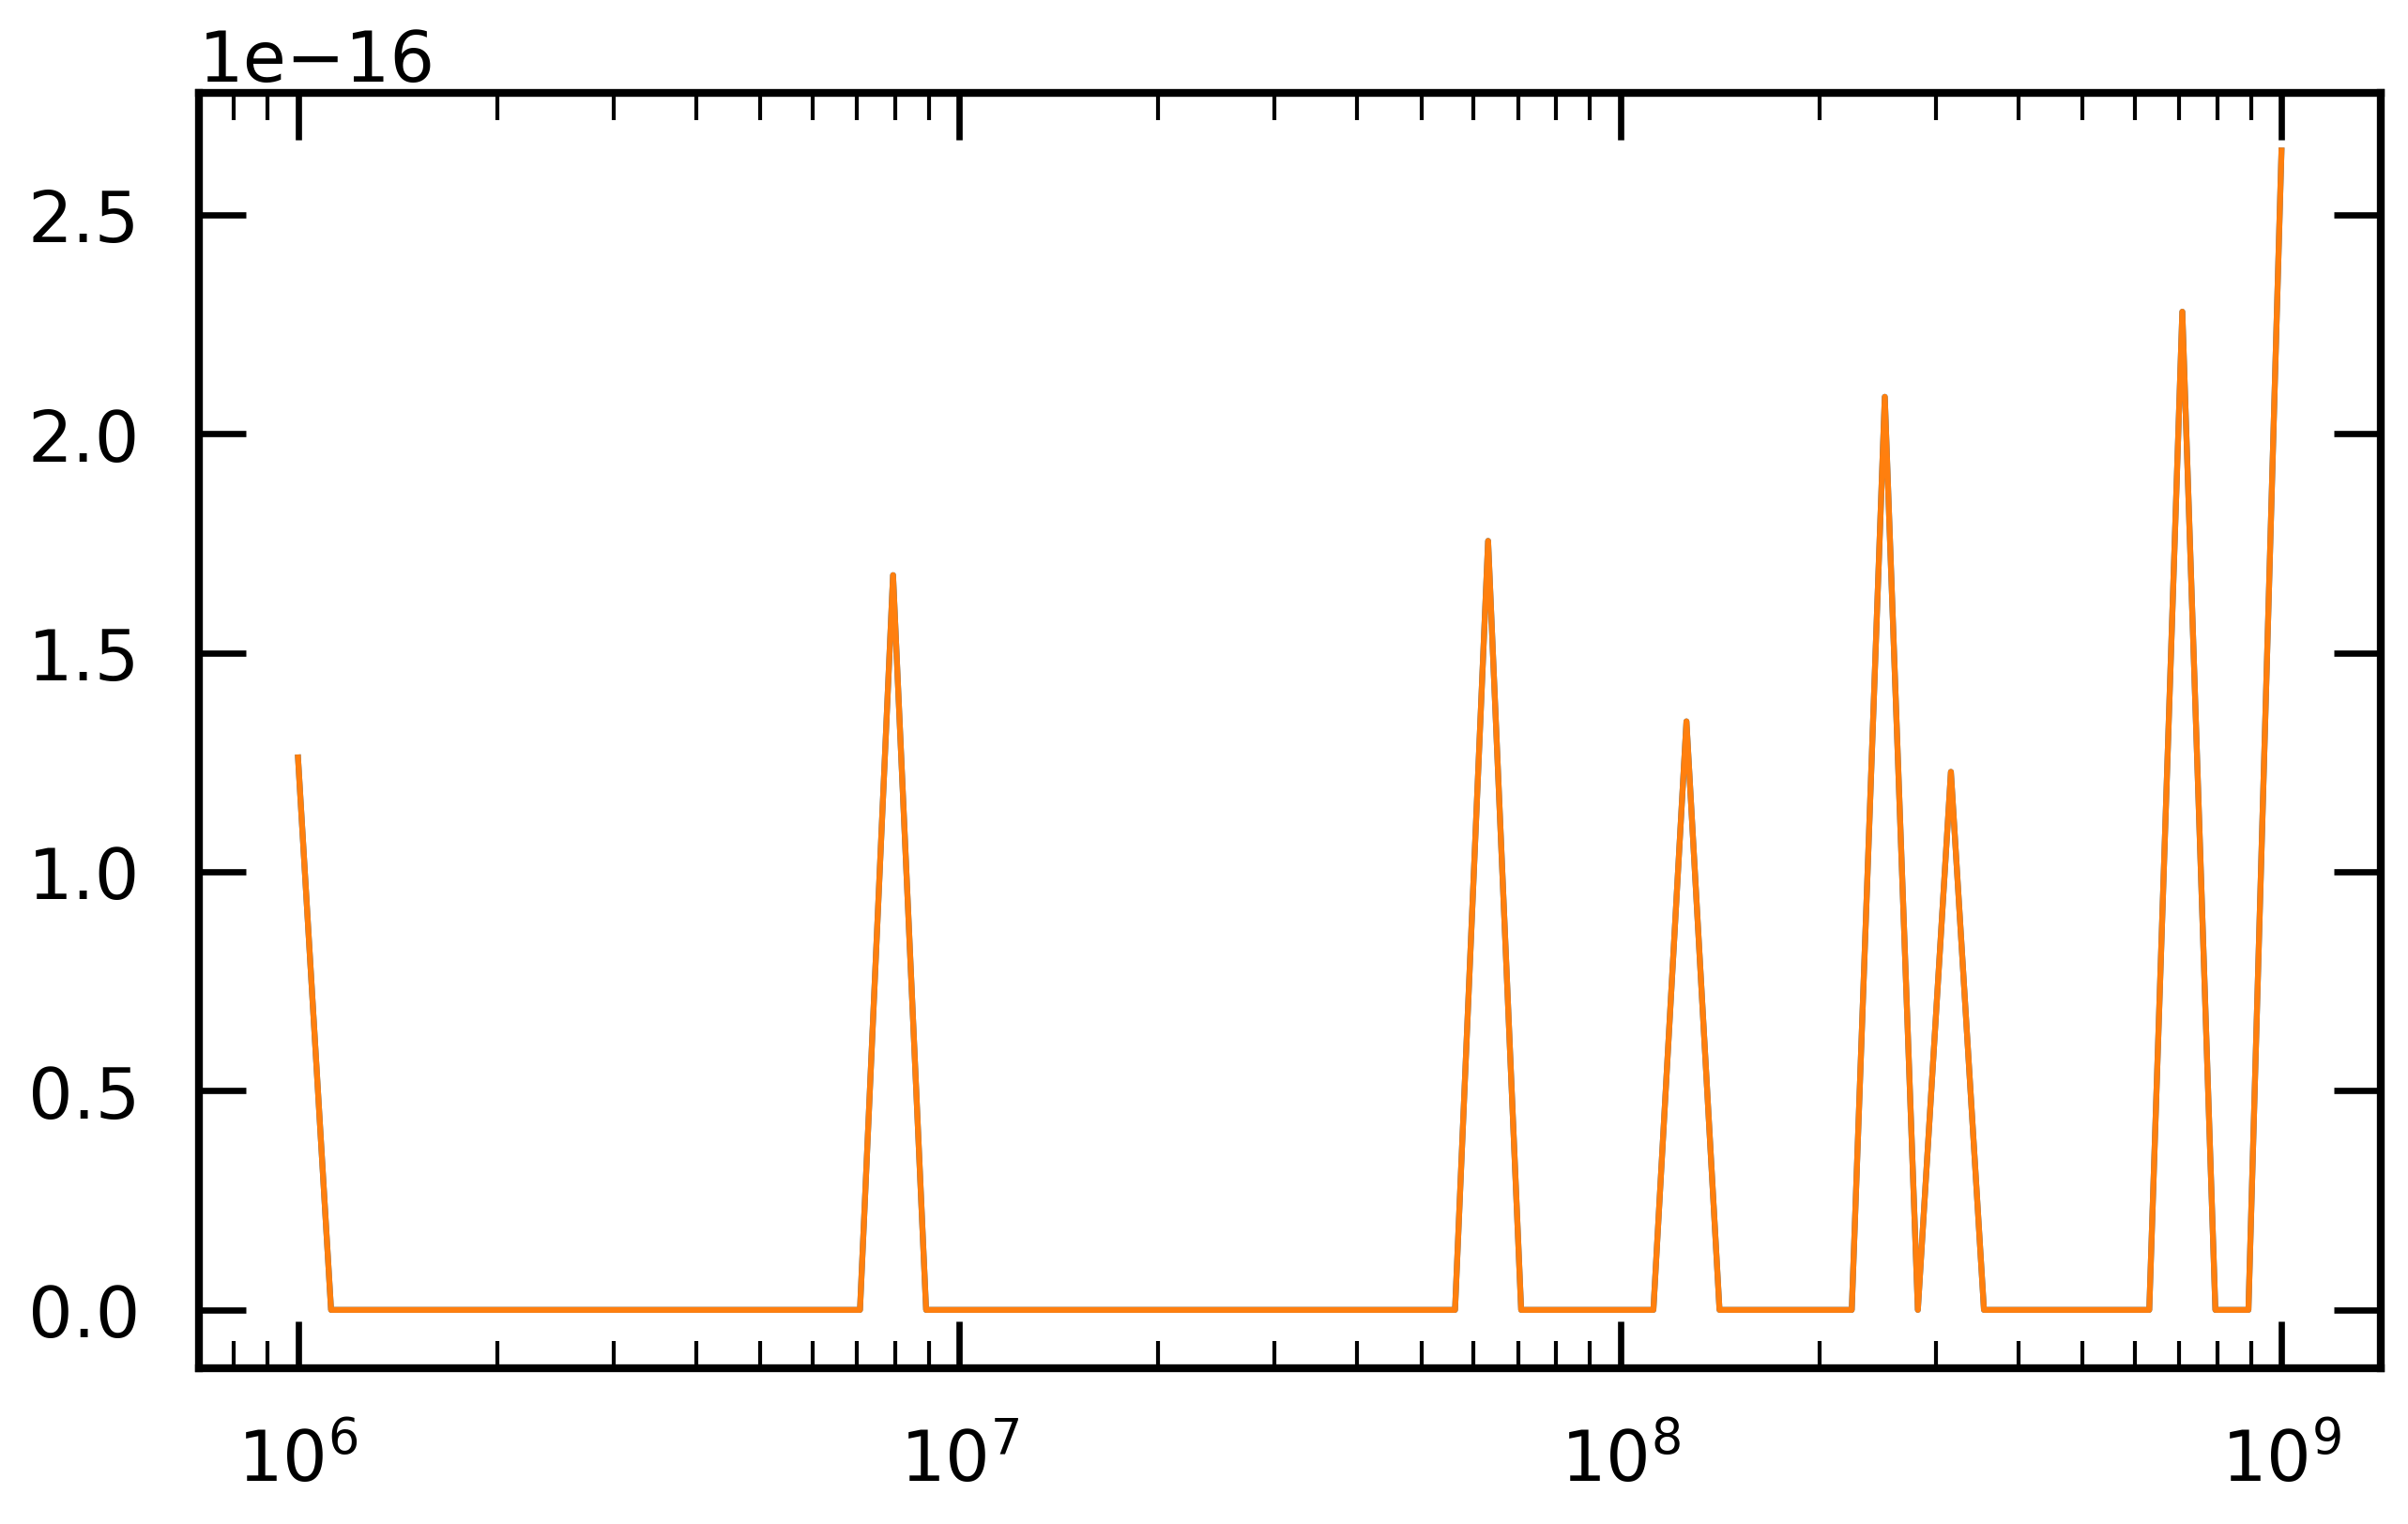

In [9]:
fig, ax = plt.subplots()
ax.plot(age_stars_SEDs, relative_difference)
ax.plot(age_stars_SEDs, relative_difference_wrapper)
ax.set_xscale('log')
# ax.set_yscale('log')

# H2p stuff

## datasets

In [117]:
from LWphotorates.H2p import read_Babb, read_Zammit
from LWphotorates.utils import lambda2nu

In [8]:
data_example_path = os.path.join(os.getcwd(), 'inputdata', 'example_spectra', 'exampleSlug.txt')
data_example = np.loadtxt(data_example_path)

age_stars_SEDs = np.logspace(6, 9, 61)
wl_SEDs = data_example[0] * u.angstrom
spectra_SEDs = data_example[1:] * u.erg / u.s / u.angstrom

freq_SEDs = lambda2nu(wl_SEDs)
energy_SEDs = const.h.to(u.eV / u.Hz) * freq_SEDs

In [119]:
energy_levels_babb, cross_section_babb = read_Babb(wl_SEDs)

In [120]:
energy_levels_zammit, cross_section_zammit = read_Zammit(wl_SEDs)

In [121]:
print(energy_levels_babb['eV'].shape)
print(energy_levels_zammit['eV'].shape)

(337,)
(423,)


### quick investigation: some comparison plots

(0.1, 30)

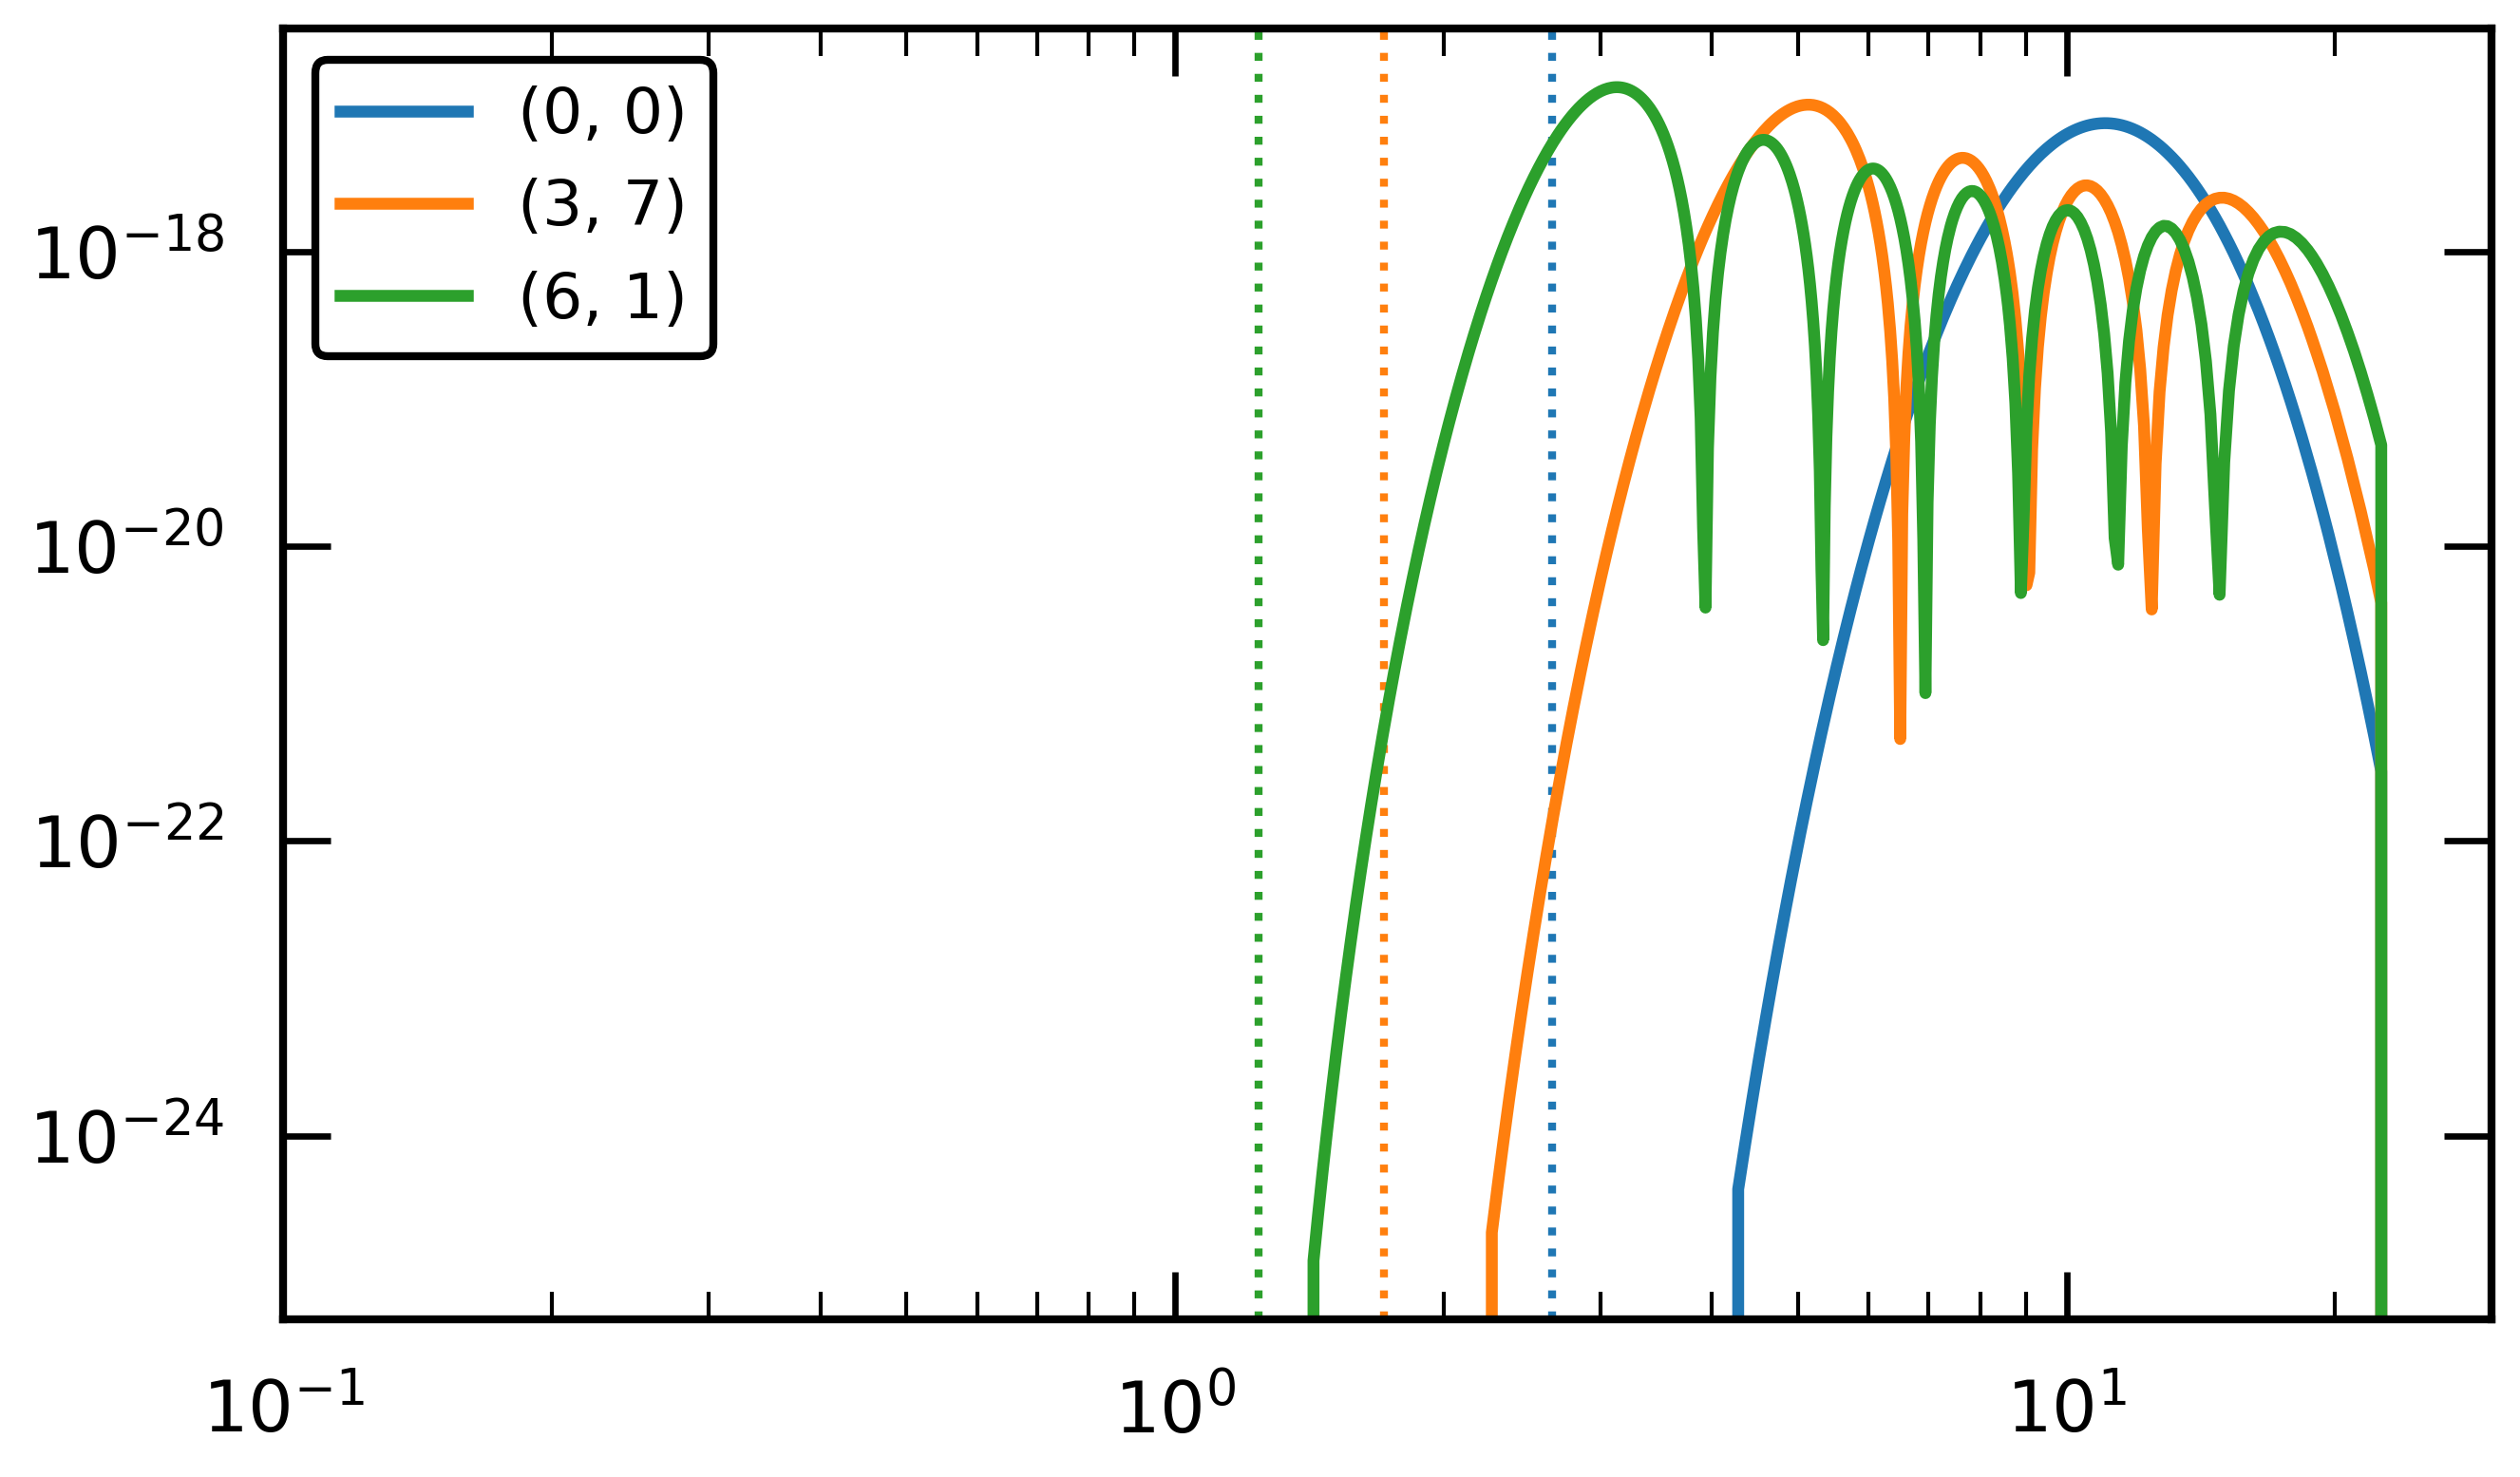

In [30]:
fig, ax = plt.subplots()
index = 0
ax.plot(energy_SEDs, cross_section_babb['sigma'][index][::-1],
        label='({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls='-', lw=3, c='C0')
ax.axvline(x=energy_levels_babb['eV'][index].value, ls=':', lw=2, c='C0')
index = 60
ax.plot(energy_SEDs, cross_section_babb['sigma'][index][::-1],
        label='({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls='-', lw=3, c='C1')
ax.axvline(x=energy_levels_babb['eV'][index].value, ls=':', lw=2, c='C1')
index = 120
ax.plot(energy_SEDs, cross_section_babb['sigma'][index][::-1],
        label='({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls='-', lw=3, c='C2')
ax.axvline(x=energy_levels_babb['eV'][index].value, ls=':', lw=2, c='C2')
ax.set_xscale('log')
ax.set_yscale('log')
legend = ax.legend(ncol=1, loc='best')
legend.get_frame().set_linewidth(2)
ax.set_xlim(left=0.1, right=30)

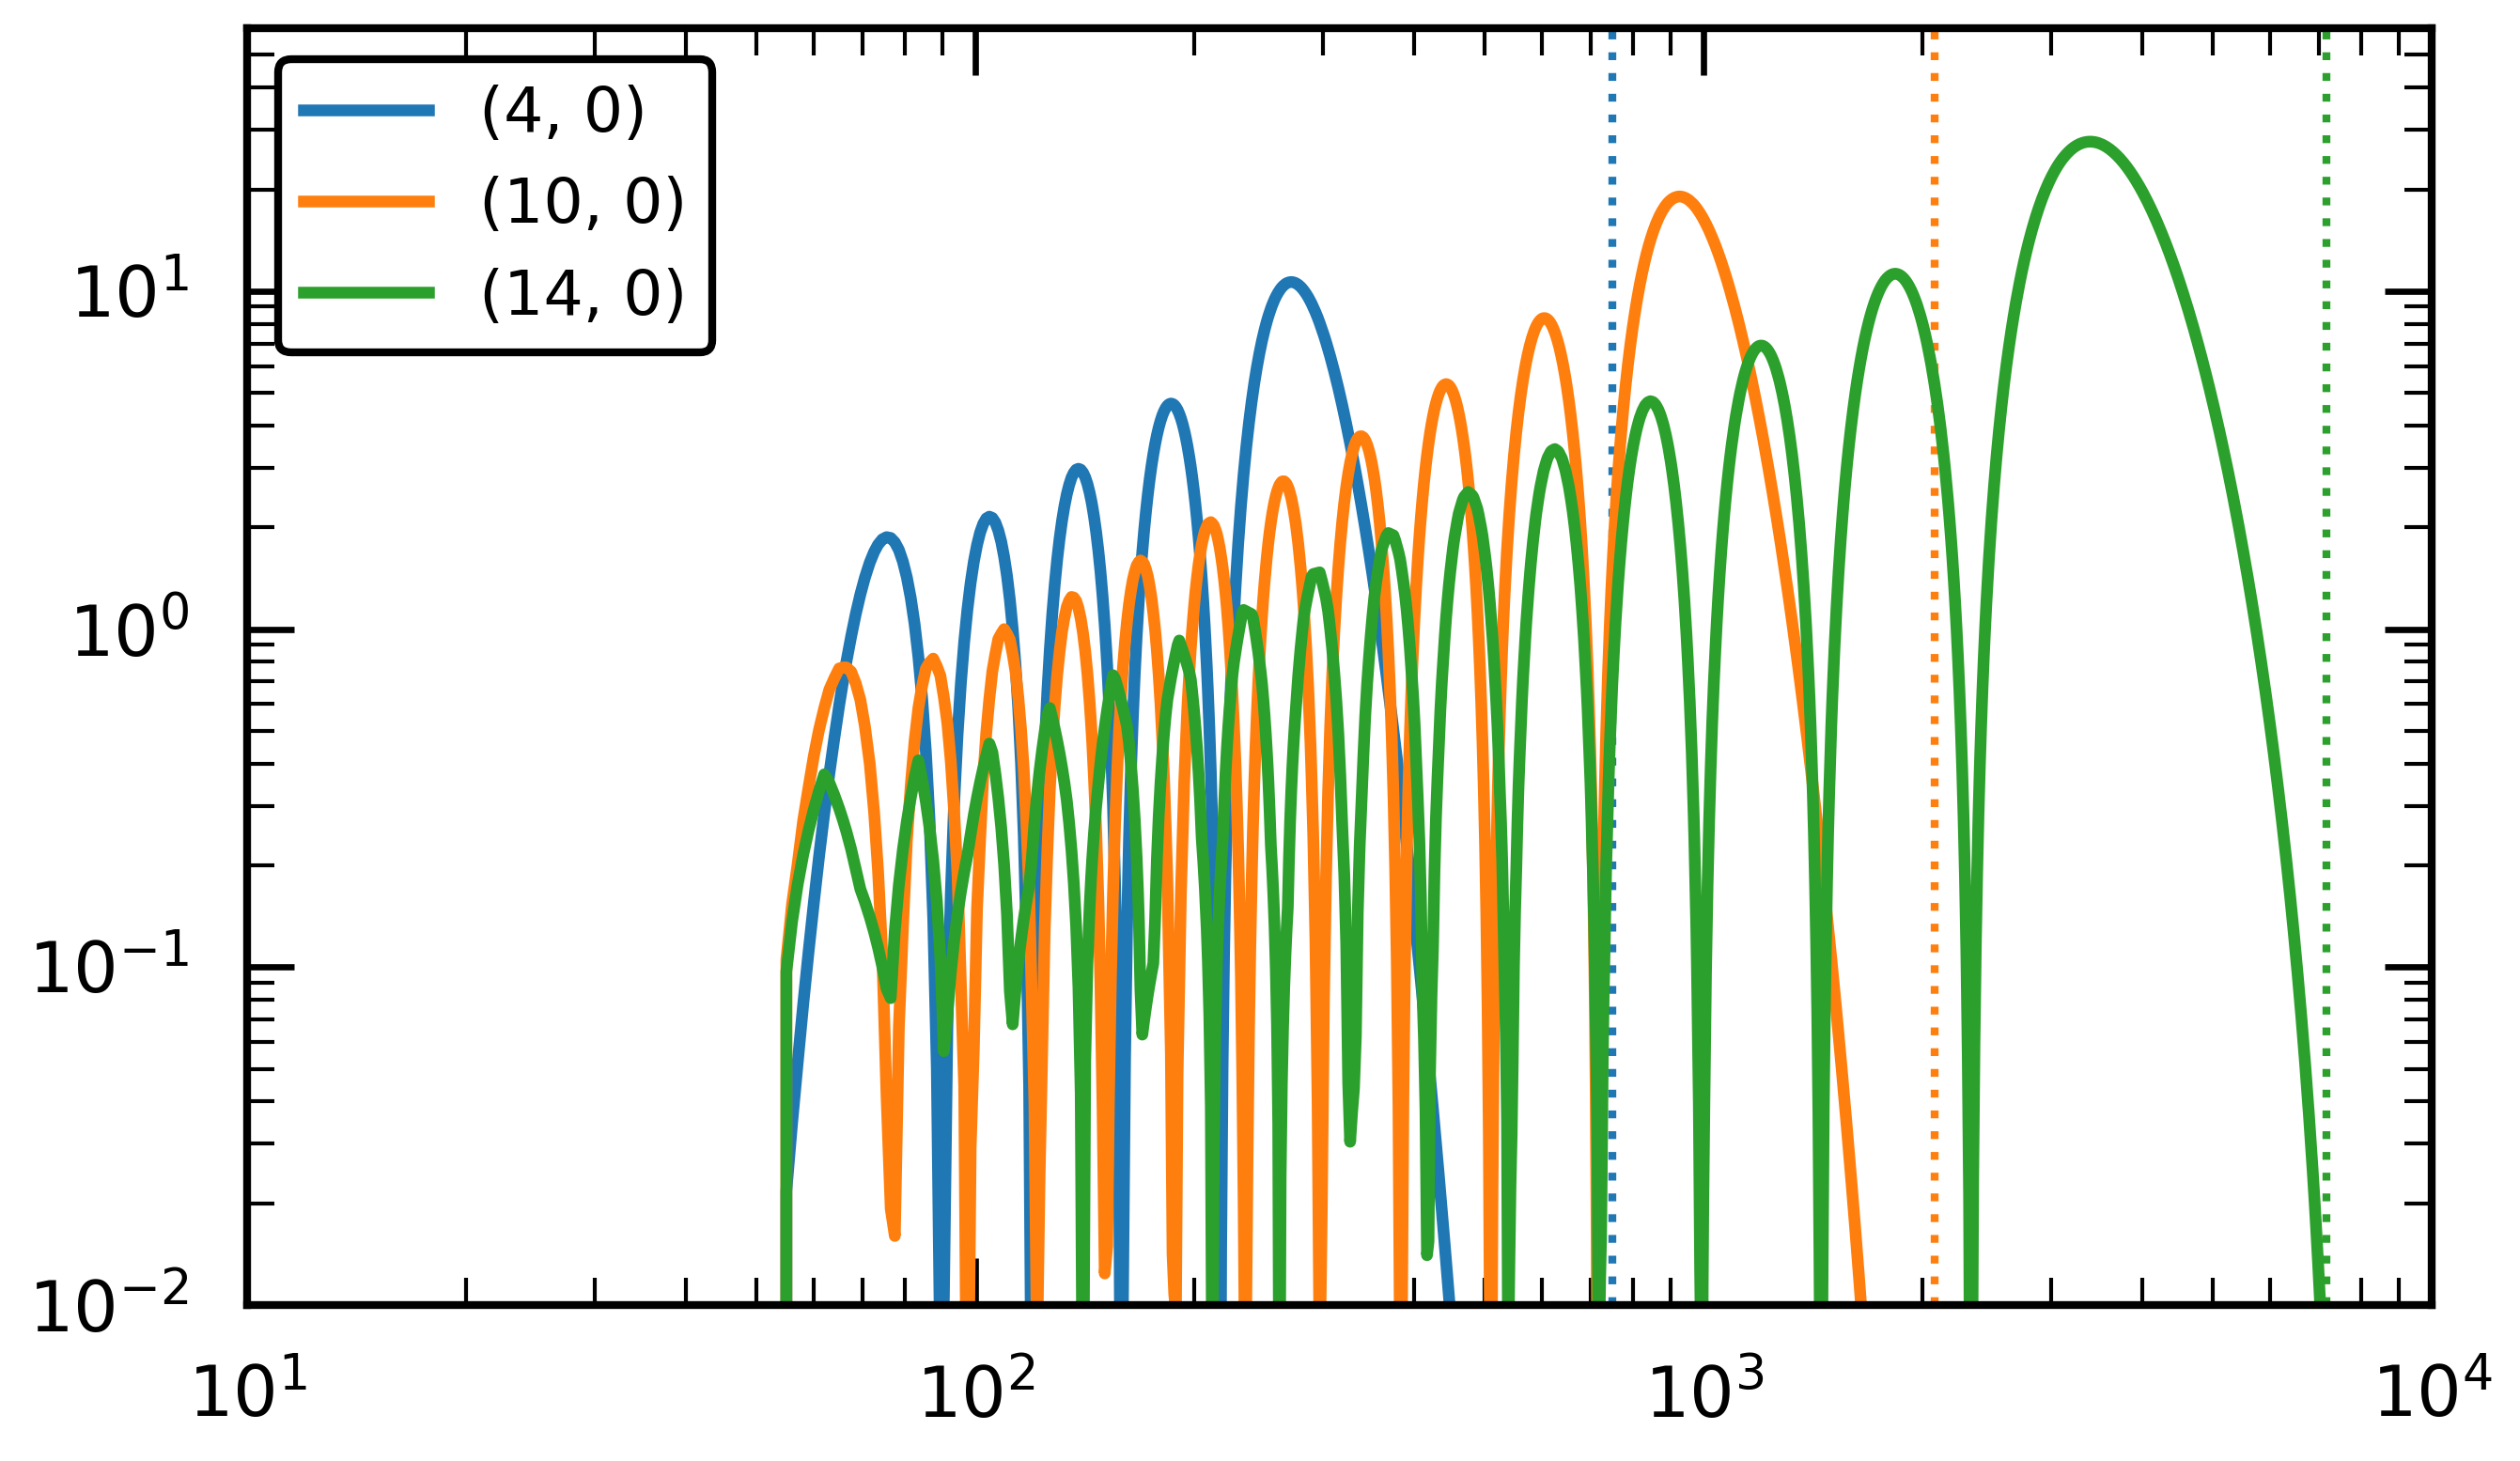

In [63]:
fig, ax = plt.subplots()
index = 74
ax.plot(wl_SEDs.to(u.nm), cross_section_babb['sigma'][index]*1e18,
        label='({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls='-', lw=3, c='C0')
ax.axvline(x=((1. / energy_levels_babb['cm'][index]).to(u.nm)).value, ls=':', lw=2, c='C0')
index = 213
ax.plot(wl_SEDs.to(u.nm), cross_section_babb['sigma'][index]*1e18,
        label='({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls='-', lw=3, c='C1')
ax.axvline(x=((1. / energy_levels_babb['cm'][index]).to(u.nm)).value, ls=':', lw=2, c='C1')
index = 288
ax.plot(wl_SEDs.to(u.nm), cross_section_babb['sigma'][index]*1e18,
        label='({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls='-', lw=3, c='C2')
ax.axvline(x=((1. / energy_levels_babb['cm'][index]).to(u.nm)).value, ls=':', lw=2, c='C2')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=1e1, right=1e4)
ax.set_ylim(bottom=1e-2, top=6e1)
legend = ax.legend(ncol=1, loc='best')
legend.get_frame().set_linewidth(2)

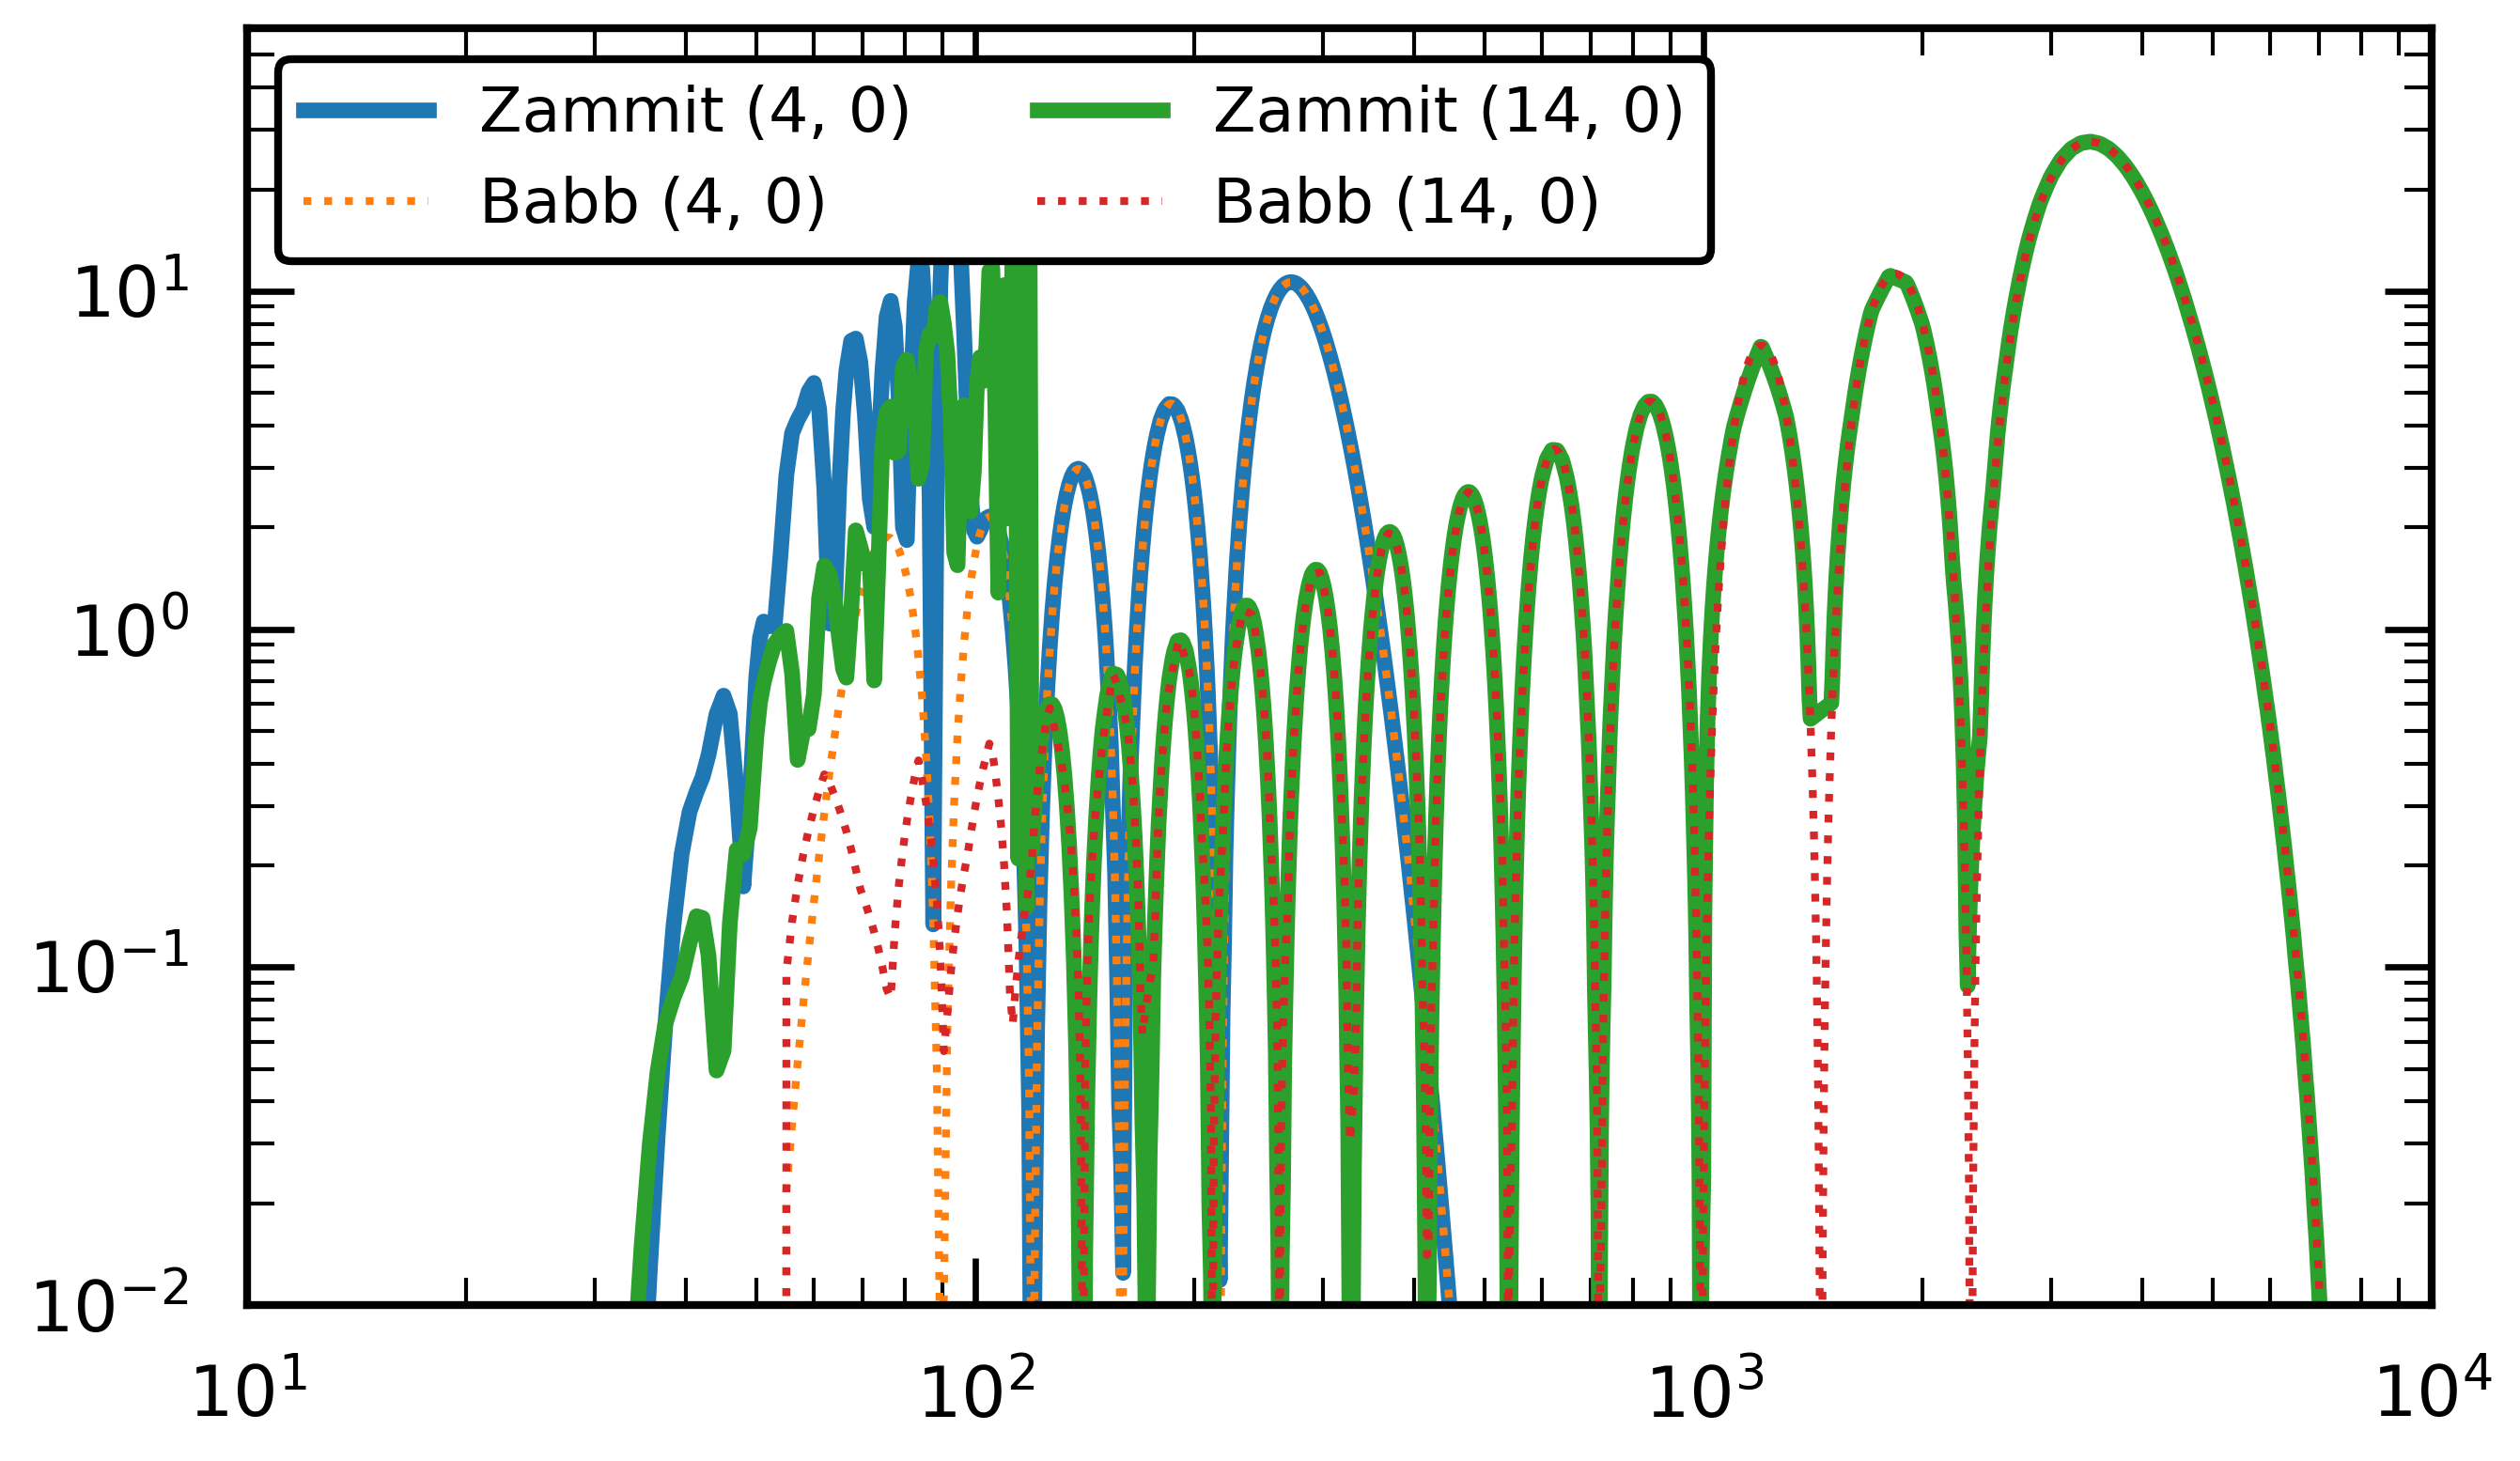

In [79]:
fig, ax = plt.subplots()
index = 137
ax.plot(wl_SEDs.to(u.nm), cross_section_zammit['sigma'][index]*1e18,
        label='Zammit ({0}, {1})'.format(energy_levels_zammit['v'][index], energy_levels_zammit['J'][index]),
        ls='-', lw=4, c='C0')
index = 74
ax.plot(wl_SEDs.to(u.nm), cross_section_babb['sigma'][index]*1e18,
        label='Babb ({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls=':', lw=2, c='C1')
index = 374
ax.plot(wl_SEDs.to(u.nm), cross_section_zammit['sigma'][index]*1e18,
        label='Zammit ({0}, {1})'.format(energy_levels_zammit['v'][index], energy_levels_zammit['J'][index]),
        ls='-', lw=4, c='C2')
index = 288
ax.plot(wl_SEDs.to(u.nm), cross_section_babb['sigma'][index]*1e18,
        label='Babb ({0}, {1})'.format(energy_levels_babb['v'][index], energy_levels_babb['J'][index]),
        ls=':', lw=2, c='C3')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=1e1, right=1e4)
ax.set_ylim(bottom=1e-2, top=6e1)
legend = ax.legend(ncol=2, loc='best')
legend.get_frame().set_linewidth(2)

In [48]:
(1. / energy_levels_babb['cm'][0]).to(u.nm)

<Quantity 467.81546551 nm>

In [32]:
energy_levels_babb['eV'][0]

<Quantity 2.65028003 eV>

In [34]:
min_wl = (55 * u.nm).to(u.Angstrom)
lambda2nu(min_wl)[0] * (const.h).to(u.eV / u.Hz)

<Quantity 22.54258153 eV>

In [43]:
energy_atomic_units = 2. * (const.Ryd) * (const.c).to(u.m * u.Hz) * (const.h).to(u.eV / u.Hz)

In [45]:
energy_atomic_units * 0.731 + energy_levels_babb['eV'][0]

<Quantity 22.54180337 eV>

### dev final functions

In [2]:
from LWphotorates.H2p import read_Babb, read_Zammit, get_cross_section_babb, get_cross_section_zammit
from LWphotorates.utils import lambda2nu

In [3]:
data_example_path = os.path.join(os.getcwd(), 'inputdata', 'example_spectra', 'exampleSlug.txt')
data_example = np.loadtxt(data_example_path)

age_stars_SEDs = np.logspace(6, 9, 61)
wl_SEDs = data_example[0] * u.angstrom
spectra_SEDs = data_example[1:] * u.erg / u.s / u.angstrom

freq_SEDs = lambda2nu(wl_SEDs)
energy_SEDs = const.h.to(u.eV / u.Hz) * freq_SEDs

In [4]:
old_babb_data = read_Babb(wl_SEDs)
old_zammit_data = read_Zammit(wl_SEDs)

In [5]:
new_babb_data = get_cross_section_babb(wl_SEDs)
new_zammit_data = get_cross_section_zammit()

In [36]:
for key in new_zammit_data.keys():
    print('{0}: {1} {2}'.format(key, new_zammit_data[key].shape, type(new_zammit_data[key])))

print('\n\n')

for key in new_babb_data.keys():
    print('{0}: {1} {2}'.format(key, new_babb_data[key].shape, type(new_babb_data[key])))

v: (423,) <class 'numpy.ndarray'>
J: (423,) <class 'numpy.ndarray'>
eV: (423,) <class 'astropy.units.quantity.Quantity'>
cm: (423,) <class 'astropy.units.quantity.Quantity'>
K: (423,) <class 'astropy.units.quantity.Quantity'>
photon_wl: (650,) <class 'astropy.units.quantity.Quantity'>
photon_energy: (650,) <class 'astropy.units.quantity.Quantity'>
cross_section: (423, 650) <class 'astropy.units.quantity.Quantity'>
heating_cross_section: (423, 650) <class 'astropy.units.quantity.Quantity'>



v: (337,) <class 'numpy.ndarray'>
J: (337,) <class 'numpy.ndarray'>
eV: (337,) <class 'astropy.units.quantity.Quantity'>
cm: (337,) <class 'astropy.units.quantity.Quantity'>
K: (337,) <class 'astropy.units.quantity.Quantity'>
photon_wl: (1221,) <class 'astropy.units.quantity.Quantity'>
photon_energy: (1221,) <class 'astropy.units.quantity.Quantity'>
cross_section: (337, 1221) <class 'astropy.units.quantity.Quantity'>
heating_cross_section: (337, 1221) <class 'astropy.units.quantity.Quantity'>


In [6]:
print(new_babb_data.keys())
print(old_babb_data[0].keys())
print(old_babb_data[1].keys())

dict_keys(['v', 'J', 'eV', 'cm', 'K', 'photon_wl', 'photon_energy', 'cross_section', 'heating_cross_section'])
dict_keys(['v', 'J', 'cm', 'eV', 'K'])
dict_keys(['sigma', 'heat_sigma'])


In [7]:
print(abs(new_babb_data['v'] - old_babb_data[0]['v']).max())
print(abs(new_babb_data['J'] - old_babb_data[0]['J']).max())

0
0


In [8]:
print(abs(new_babb_data['cross_section'] - old_babb_data[1]['sigma']).max())
print(abs(new_babb_data['heating_cross_section'] - old_babb_data[1]['heat_sigma']).max())

0.0 cm2
0.0 cm2 eV


In [9]:
print(new_zammit_data.keys())
print(old_zammit_data[0].keys())
print(old_zammit_data[1].keys())

dict_keys(['v', 'J', 'eV', 'cm', 'K', 'photon_wl', 'photon_energy', 'cross_section', 'heating_cross_section'])
dict_keys(['v', 'J', 'eV', 'cm', 'K'])
dict_keys(['sigma', 'heat_sigma'])


In [10]:
print(abs(new_zammit_data['v'] - old_zammit_data[0]['v']).max())
print(abs(new_zammit_data['J'] - old_zammit_data[0]['J']).max())

0
0


(100.0, 10000.0)

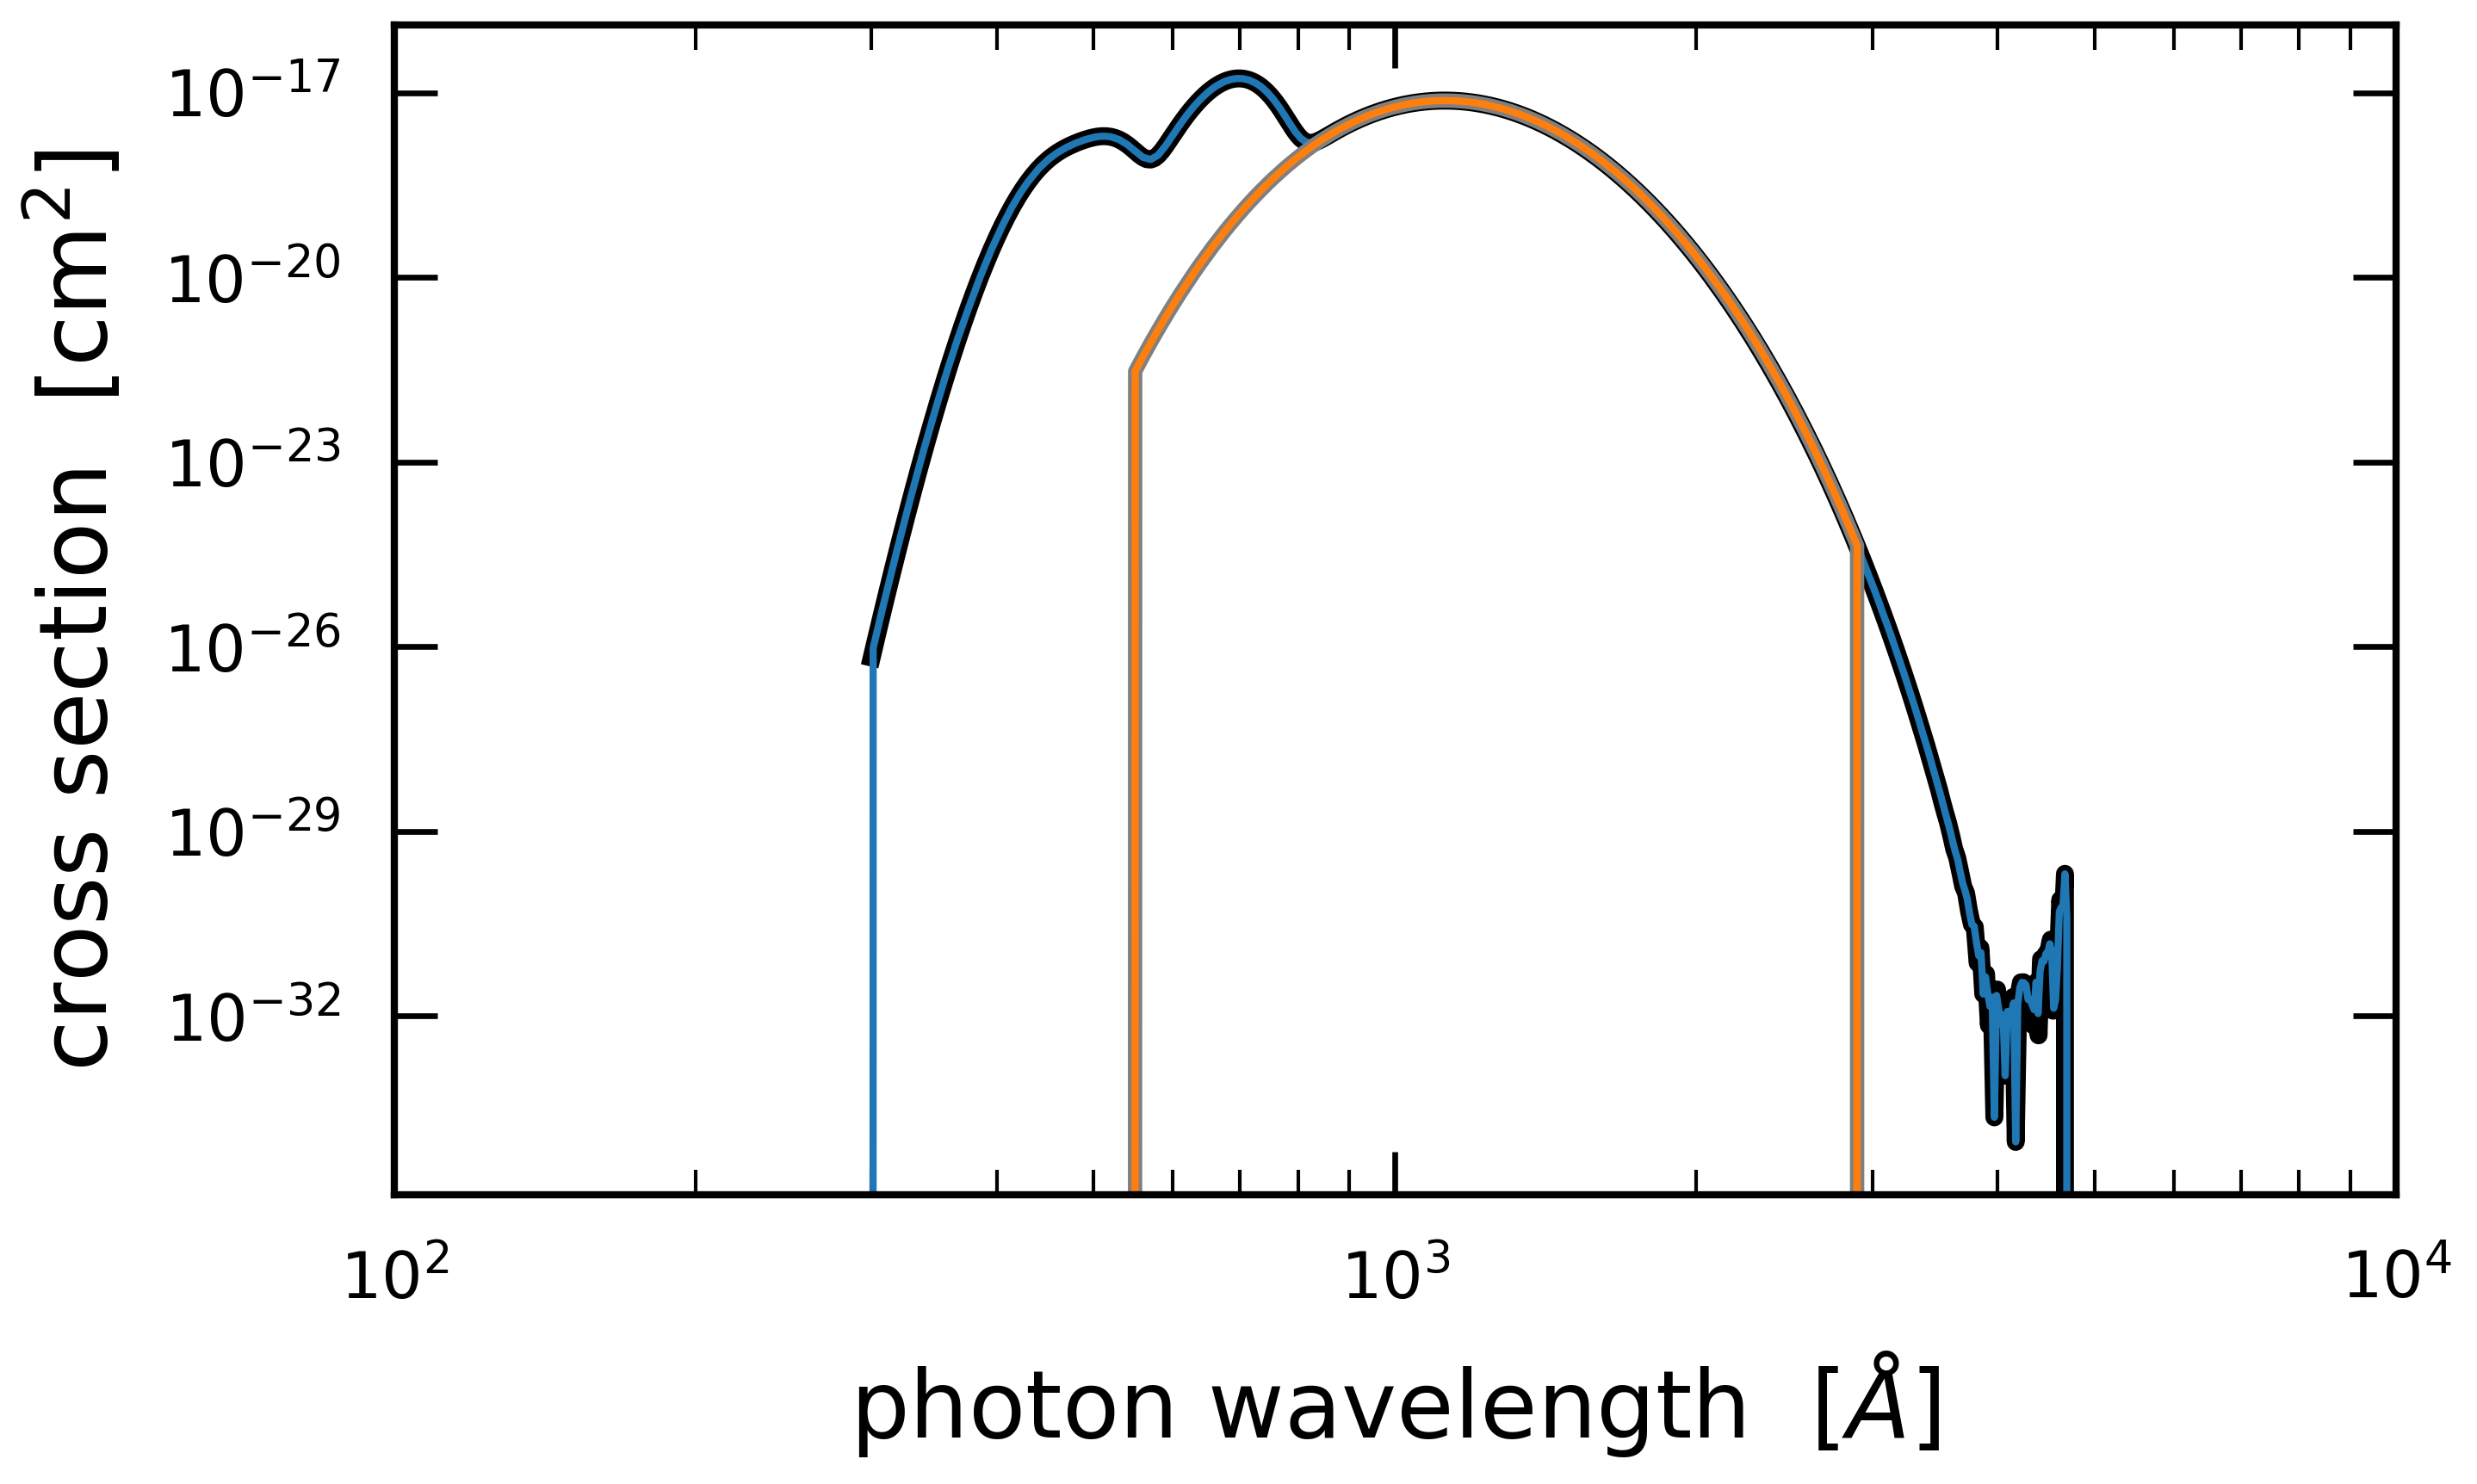

In [25]:
fig, ax = plt.subplots()
ax.plot(new_zammit_data['photon_wl'], new_zammit_data['cross_section'][0], c='k', lw=5, ls='-')
ax.plot(wl_SEDs, old_zammit_data[1]['sigma'][0], c='C0', lw=2, ls='-')
ax.plot(new_babb_data['photon_wl'], new_babb_data['cross_section'][0], c='grey', lw=4, ls='-')
ax.plot(wl_SEDs, old_babb_data[1]['sigma'][0], c='C1', lw=2, ls='-')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'photon wavelength  [$\AA$]')
ax.set_ylabel(r'cross section  [cm$^2$]')
ax.set_xlim(left=1e2, right=1e4)

(1.0, 100.0)

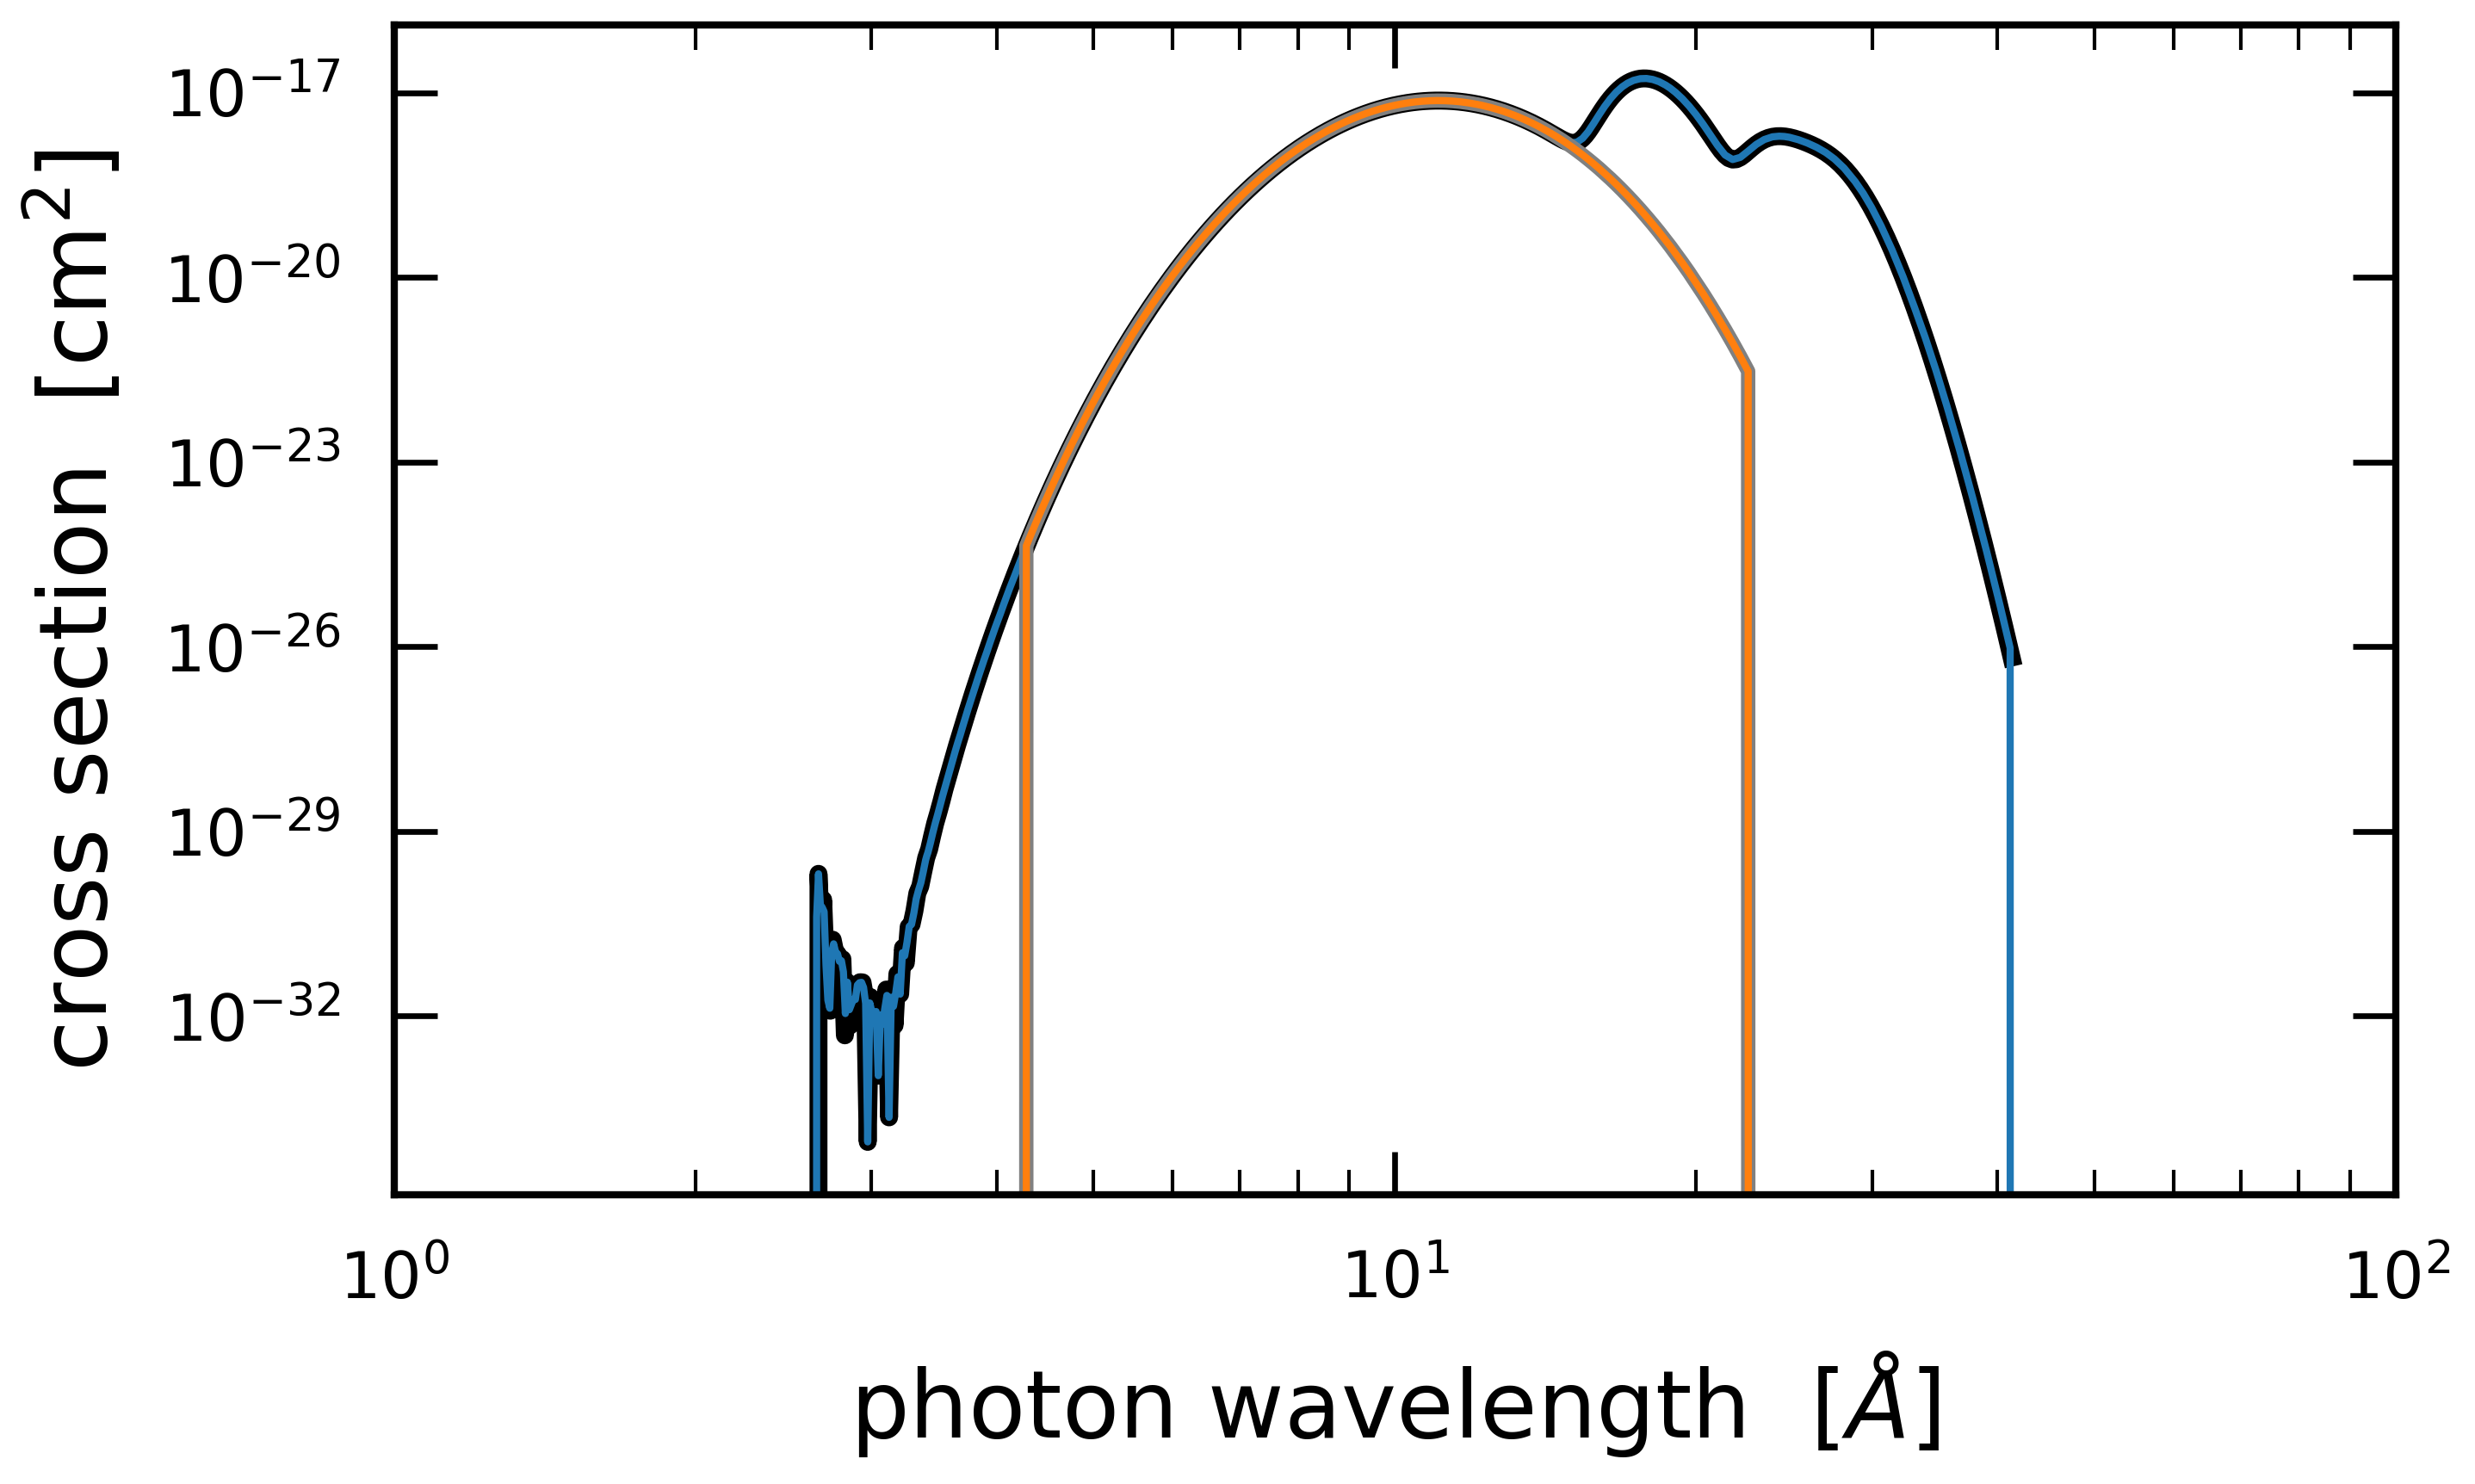

In [31]:
fig, ax = plt.subplots()
ax.plot(new_zammit_data['photon_energy'], new_zammit_data['cross_section'][0], c='k', lw=5, ls='-')
ax.plot(energy_SEDs[::-1], old_zammit_data[1]['sigma'][0], c='C0', lw=2, ls='-')
ax.plot(new_babb_data['photon_energy'], new_babb_data['cross_section'][0], c='grey', lw=4, ls='-')
ax.plot(energy_SEDs[::-1], old_babb_data[1]['sigma'][0], c='C1', lw=2, ls='-')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'photon energy  [eV]')
ax.set_ylabel(r'cross section  [cm$^2$]')
ax.set_xlim(left=1e0, right=1e2)

## calculate H2p partition function

In [2]:
from LWphotorates.H2p import calculate_partition_function, Xpop, get_ground_states_data

In [6]:
gas_temperature_array = [1000., 2000., 3150., 5040., 8400., 12600., 16800., 25200.] * u.K
Zammit_values = np.array([26.1, 66.2, 142.1, 361.2, 1024.0, 2043.1, 3009.2, 4546.3])

my_values = [calculate_partition_function(gas_temperature, ground_states_data=None, normalised=False).sum() for gas_temperature in gas_temperature_array]

In [7]:
my_values

[<Quantity 26.14594648>,
 <Quantity 66.21186703>,
 <Quantity 142.16070508>,
 <Quantity 361.3548744>,
 <Quantity 1024.31732341>,
 <Quantity 2043.53326095>,
 <Quantity 3009.66024129>,
 <Quantity 4546.76532615>]

In [17]:
gas_temperature = 1e3 * u.K
ground_states_data = get_ground_states_data()
old_partition_function = Xpop(ground_states_data, gas_temperature)
new_partition_function = calculate_partition_function(gas_temperature, ground_states_data)

print(abs(new_partition_function-old_partition_function).sum())

0.0


## test critical density calculation

In [1]:
from LWphotorates.H2p import calculate_critical_density

calculate_critical_density(5e3)

<Quantity 696.53388515 1 / cm3>

## test composite cross section

In [2]:
from LWphotorates.utils import lambda2nu
from LWphotorates.H2p import get_cross_section_zammit, get_cross_section_babb, calculate_partition_function, calculate_critical_density, calculate_composite_cross_section

data_example_path = os.path.join(os.getcwd(), 'inputdata', 'example_spectra', 'exampleSlug.txt')
data_example = np.loadtxt(data_example_path)

age_stars_SEDs = np.logspace(6, 9, 61)
wl_SEDs = data_example[0] * u.angstrom
spectra_SEDs = data_example[1:] * u.erg / u.s / u.angstrom

freq_SEDs = lambda2nu(wl_SEDs)
energy_SEDs = const.h.to(u.eV / u.Hz) * freq_SEDs

In [3]:
ground_states_data = get_cross_section_zammit()

### LTE limit

In [12]:
gas_temperature = 5e3 * u.K
use_franck_condon = False

cross_section_reference = 'B_15'
custom_wavelength_array = ground_states_data['photon_wl']
babb_cross_section, babb_heating = calculate_composite_cross_section(gas_temperature, cross_section_reference, custom_wavelength_array, use_franck_condon)

cross_section_reference = 'Z_17'
custom_wavelength_array = None
zammit_cross_section, zammit_heating = calculate_composite_cross_section(gas_temperature, cross_section_reference, custom_wavelength_array, use_franck_condon)

Text(0.5, 0, 'photon energy  [eV]')

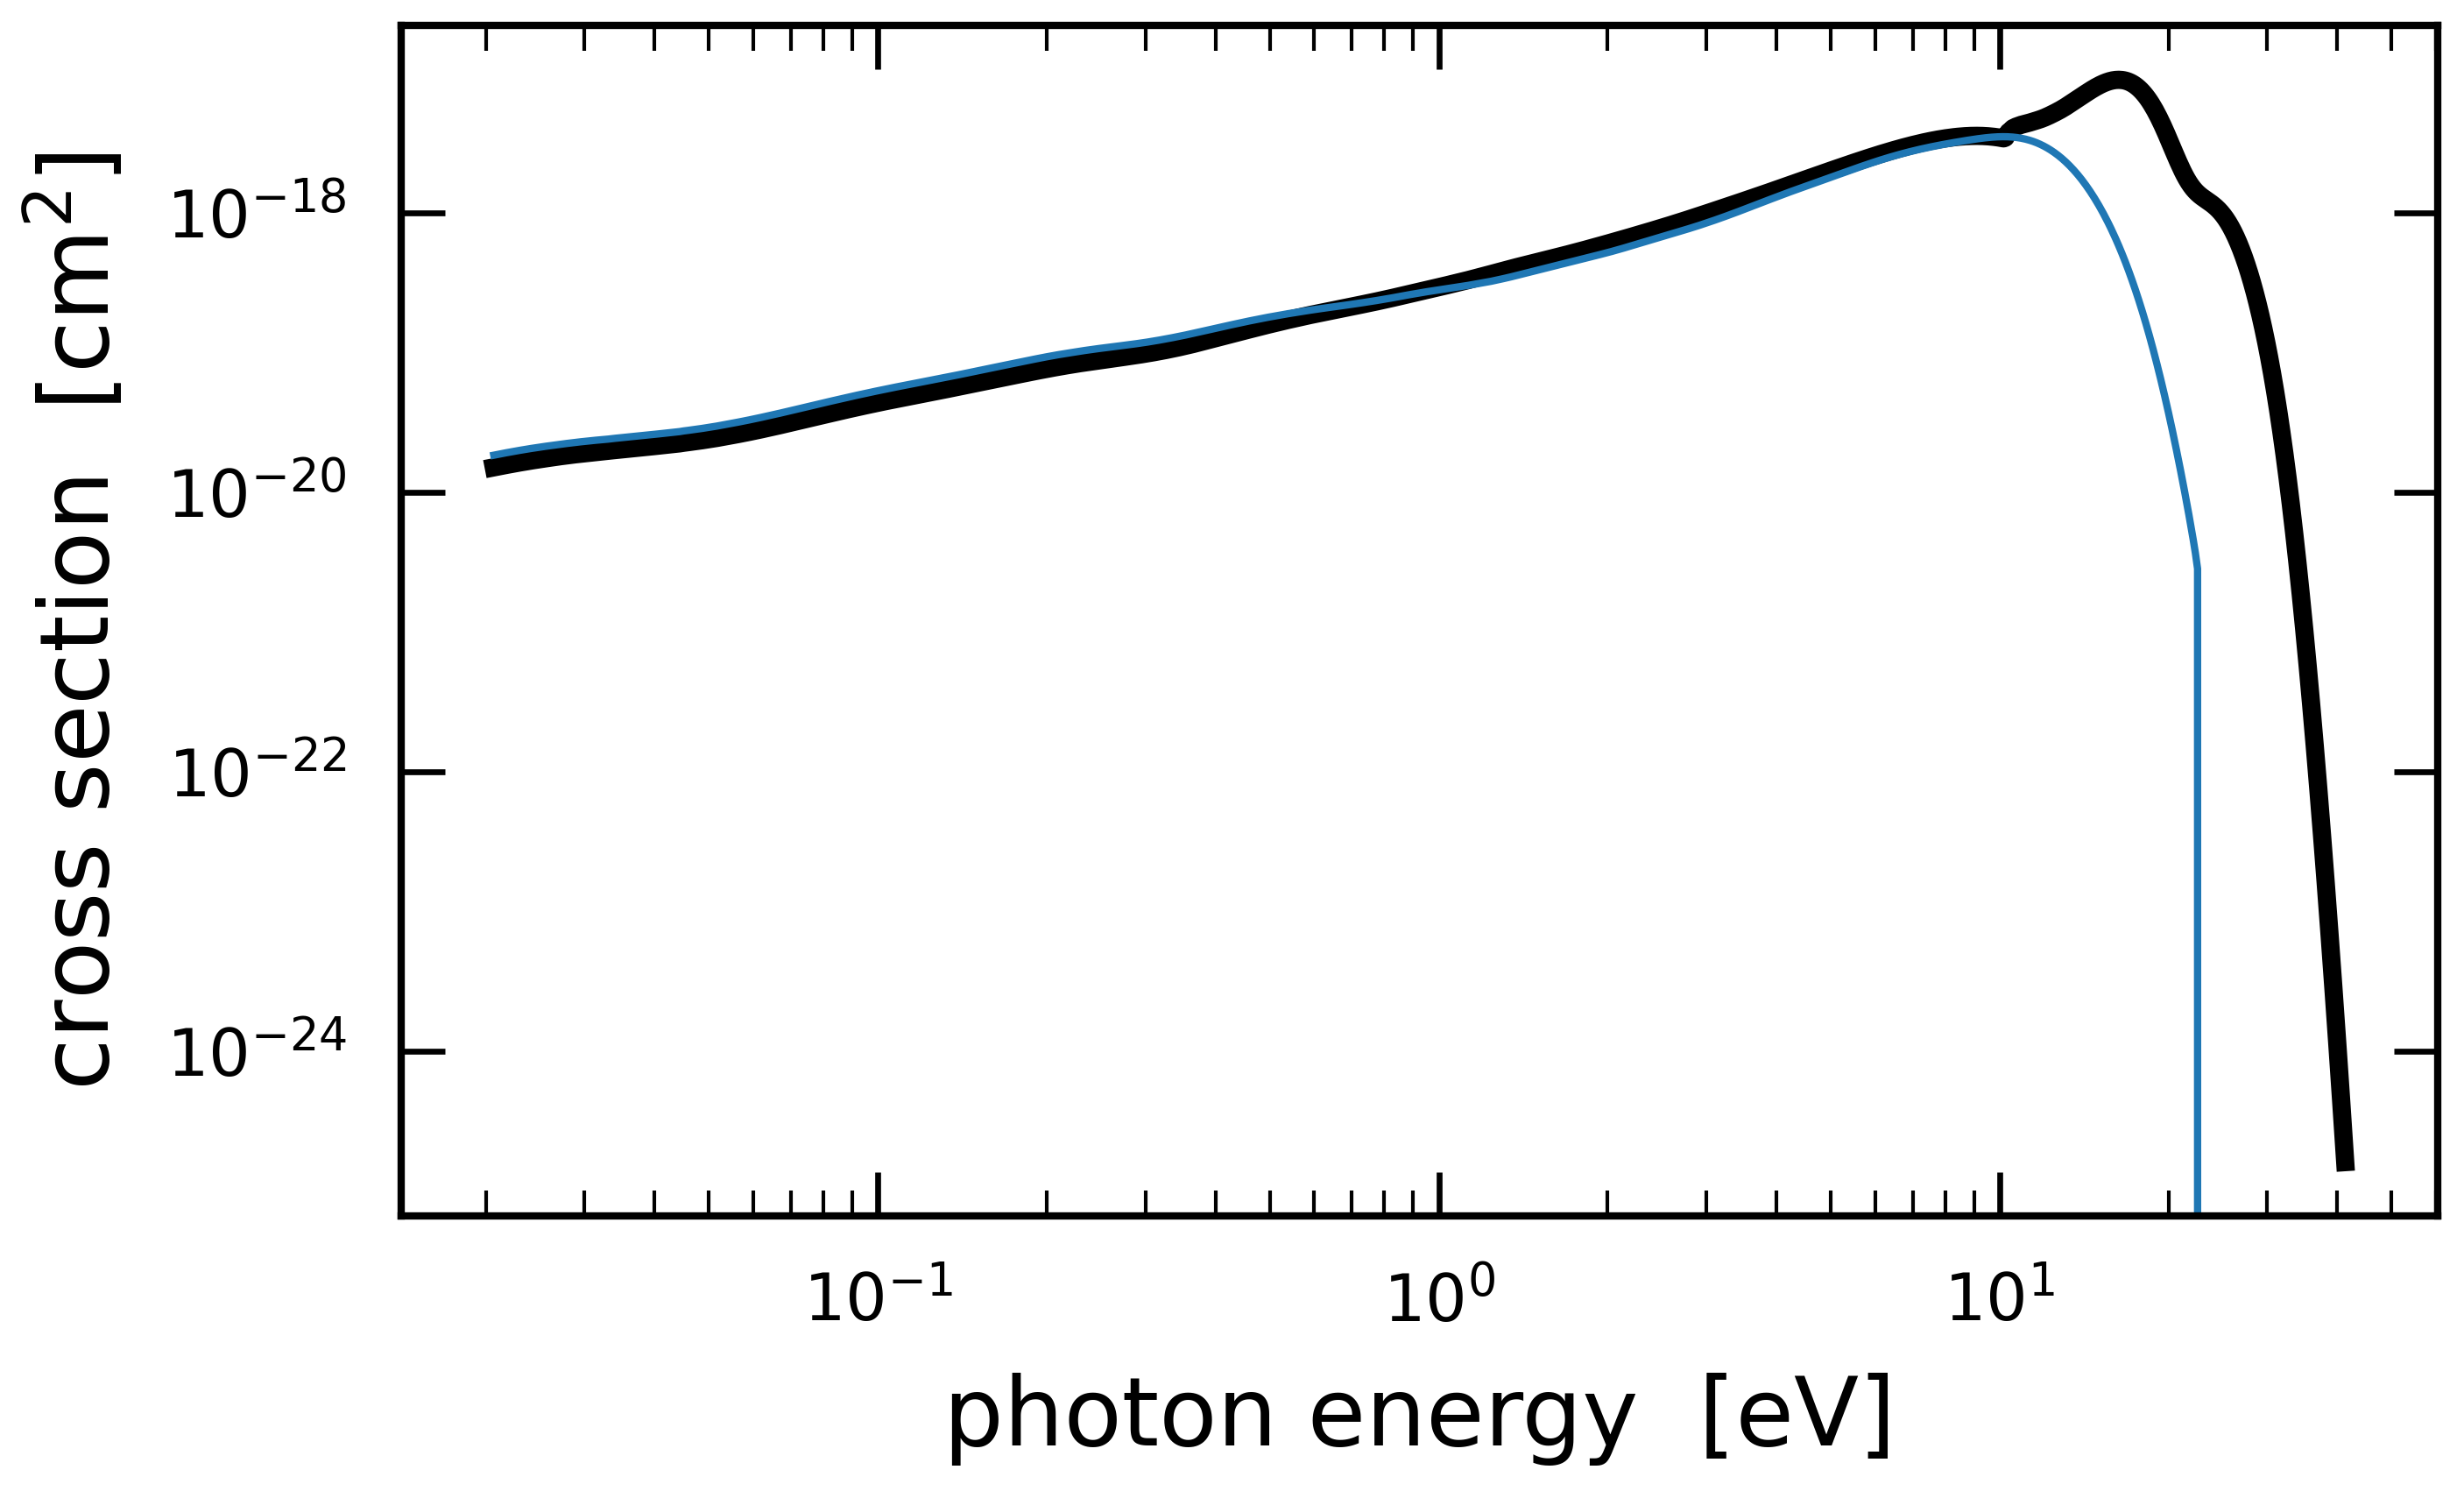

In [20]:
fig, ax = plt.subplots()
ax.plot(ground_states_data['photon_energy'], zammit_cross_section, lw=5, ls='-', c='k')
ax.plot(ground_states_data['photon_energy'], babb_cross_section, lw=2, ls='-', c='C0')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'cross section  [cm$^2$]')
# ax.set_xlabel(r'photon wavelength  [$\AA$]')
# ax.set_xlim(left=1e2, right=1e4)
ax.set_xlabel(r'photon energy  [eV]')
# ax.set_xlim(left=1e0, right=1e2)

### Franck-Condon distribution

In [8]:
gas_temperature = 5e3 * u.K
use_franck_condon = True

cross_section_reference = 'B_15'
custom_wavelength_array = ground_states_data['photon_wl']
babb_cross_section, babb_heating = calculate_composite_cross_section(gas_temperature, cross_section_reference, custom_wavelength_array, use_franck_condon)

cross_section_reference = 'Z_17'
custom_wavelength_array = None
zammit_cross_section, zammit_heating = calculate_composite_cross_section(gas_temperature, cross_section_reference, custom_wavelength_array, use_franck_condon)

Text(0.5, 0, 'photon energy  [eV]')

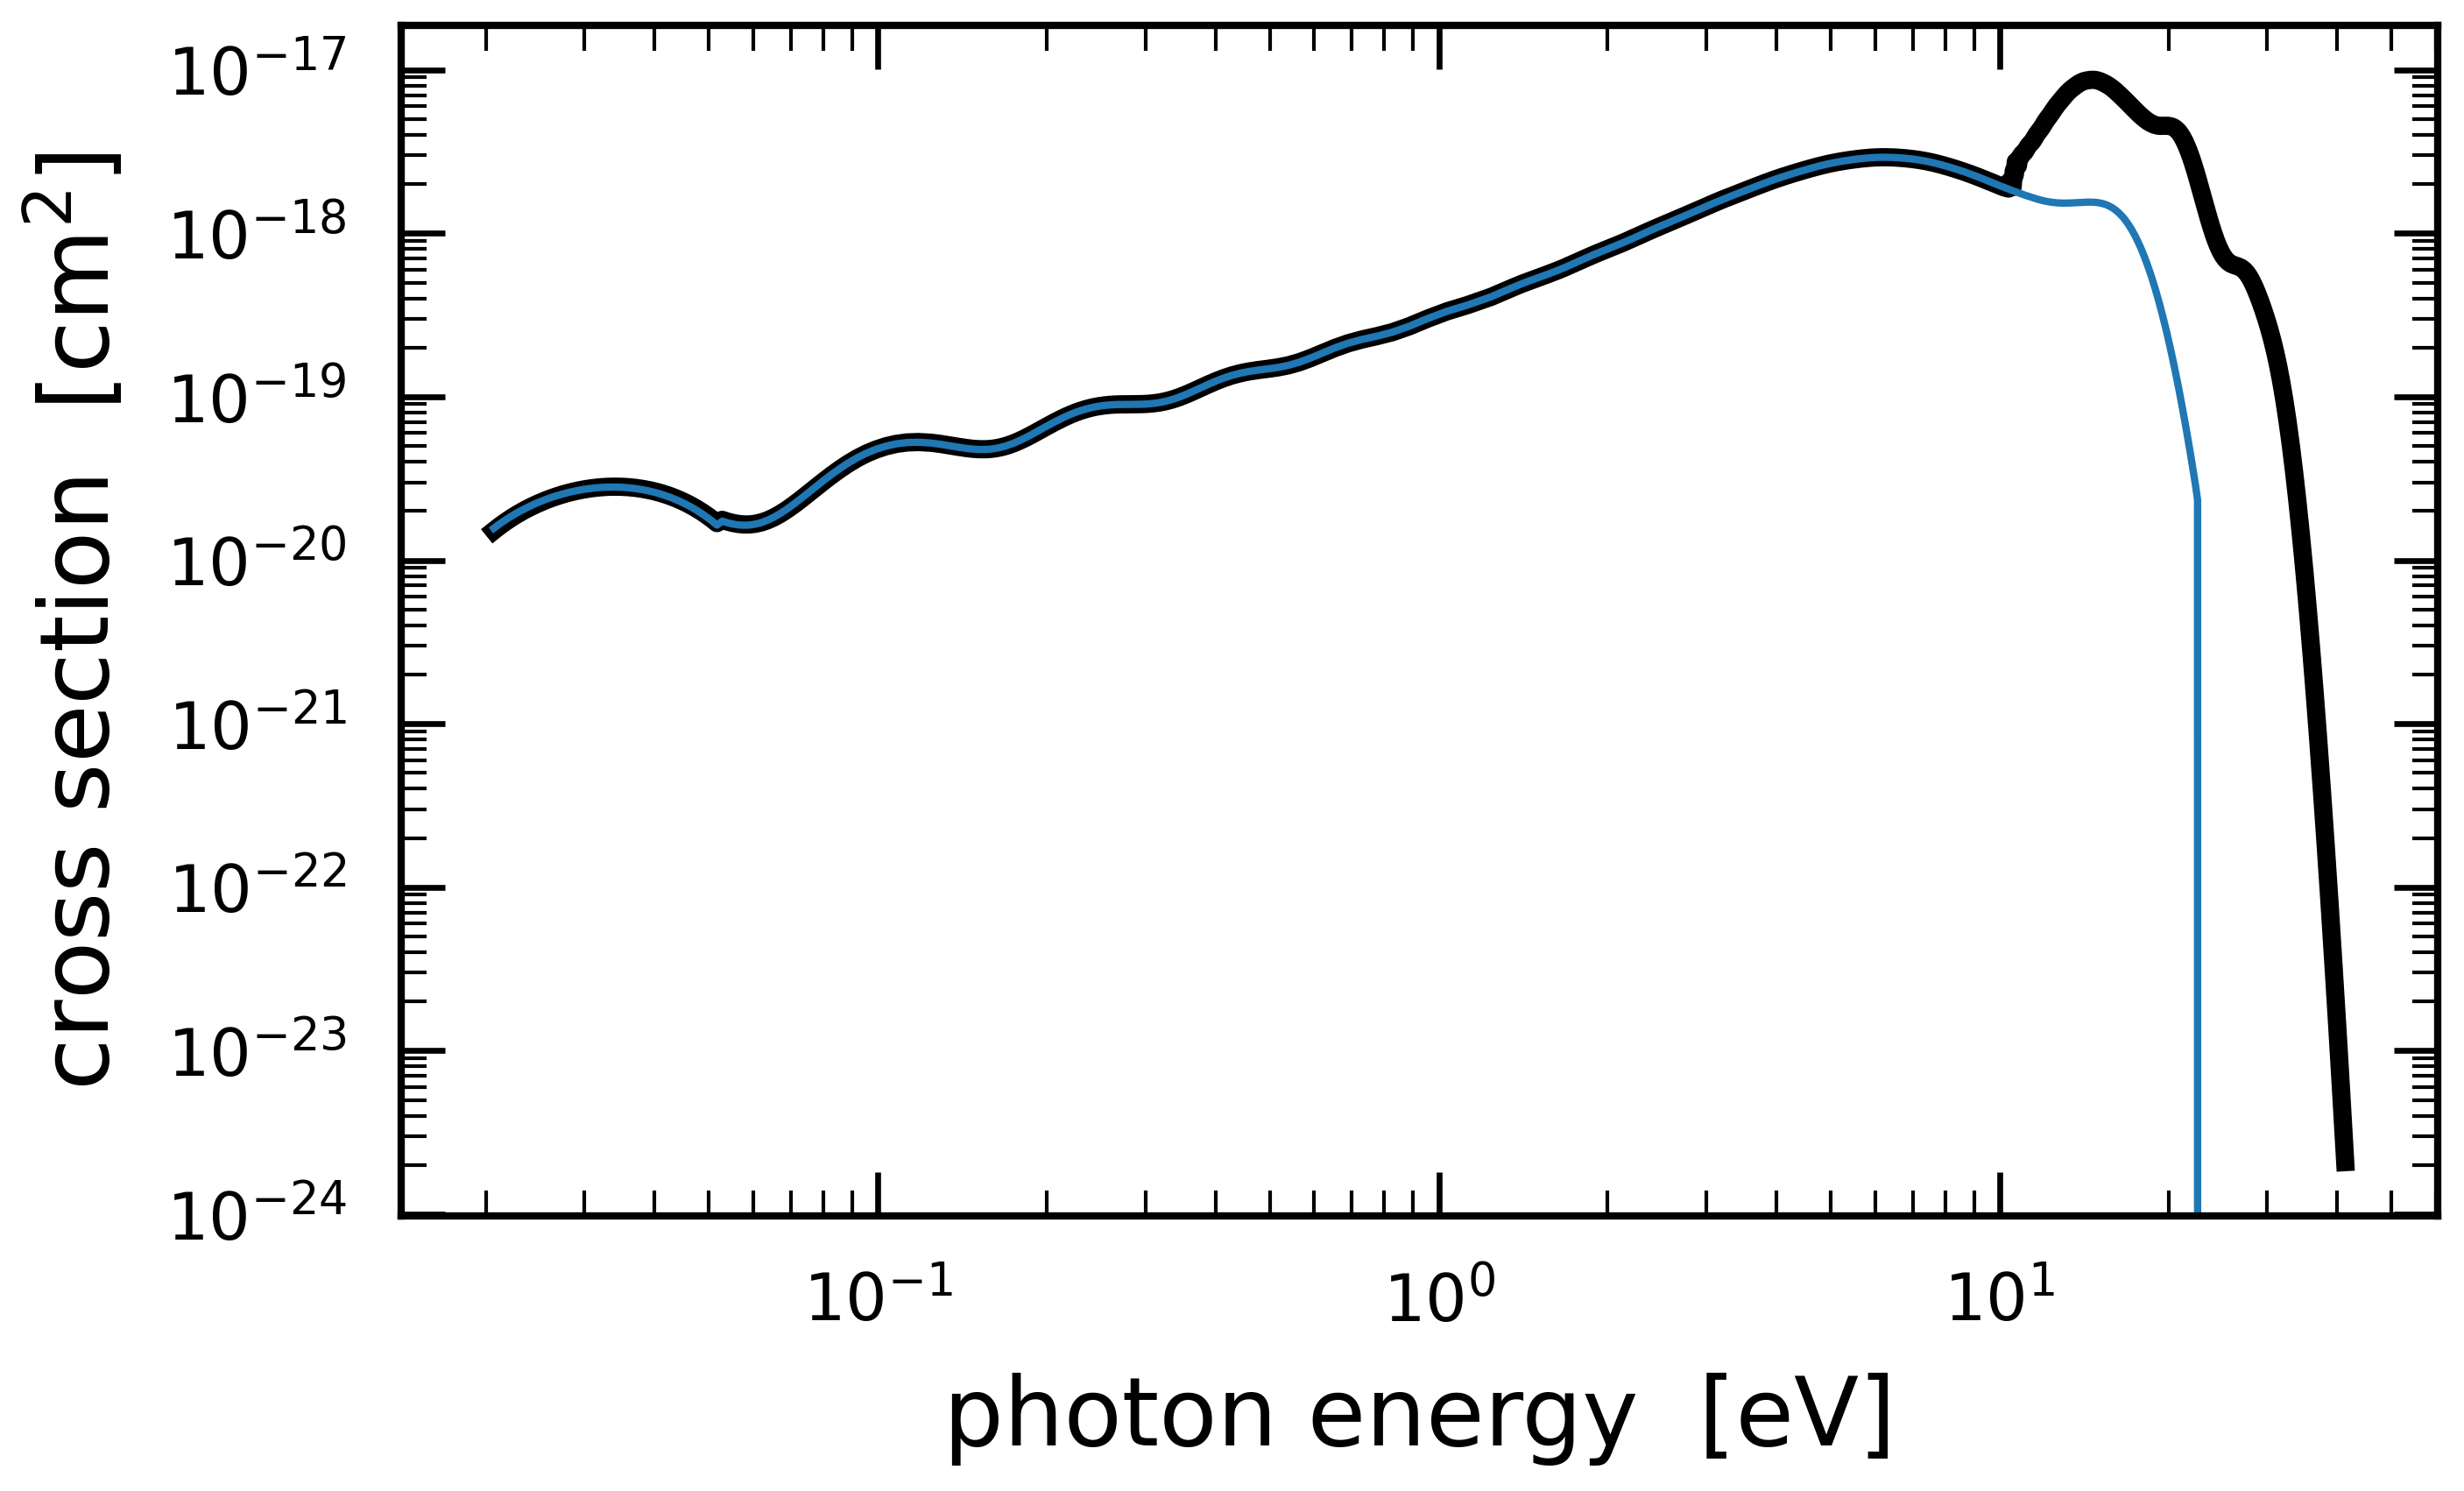

In [17]:
fig, ax = plt.subplots()
ax.plot(ground_states_data['photon_energy'], zammit_cross_section, lw=5, ls='-', c='k')
ax.plot(ground_states_data['photon_energy'], babb_cross_section, lw=2, ls='-', c='C0')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'cross section  [cm$^2$]')
# ax.set_xlabel(r'photon wavelength  [$\AA$]')
# ax.set_xlim(left=1e2, right=1e4)
ax.set_xlabel(r'photon energy  [eV]')
# ax.set_xlim(left=1e0, right=1e2)

#### same, with a custom wl array

In [15]:
gas_temperature = 5e3 * u.K
use_franck_condon = True
custom_wavelength_array = wl_SEDs

cross_section_reference = 'B_15'
babb_cross_section, babb_heating = calculate_composite_cross_section(gas_temperature, cross_section_reference, custom_wavelength_array, use_franck_condon)

cross_section_reference = 'Z_17'
zammit_cross_section, zammit_heating = calculate_composite_cross_section(gas_temperature, cross_section_reference, custom_wavelength_array, use_franck_condon)

Text(0.5, 0, 'photon energy  [eV]')

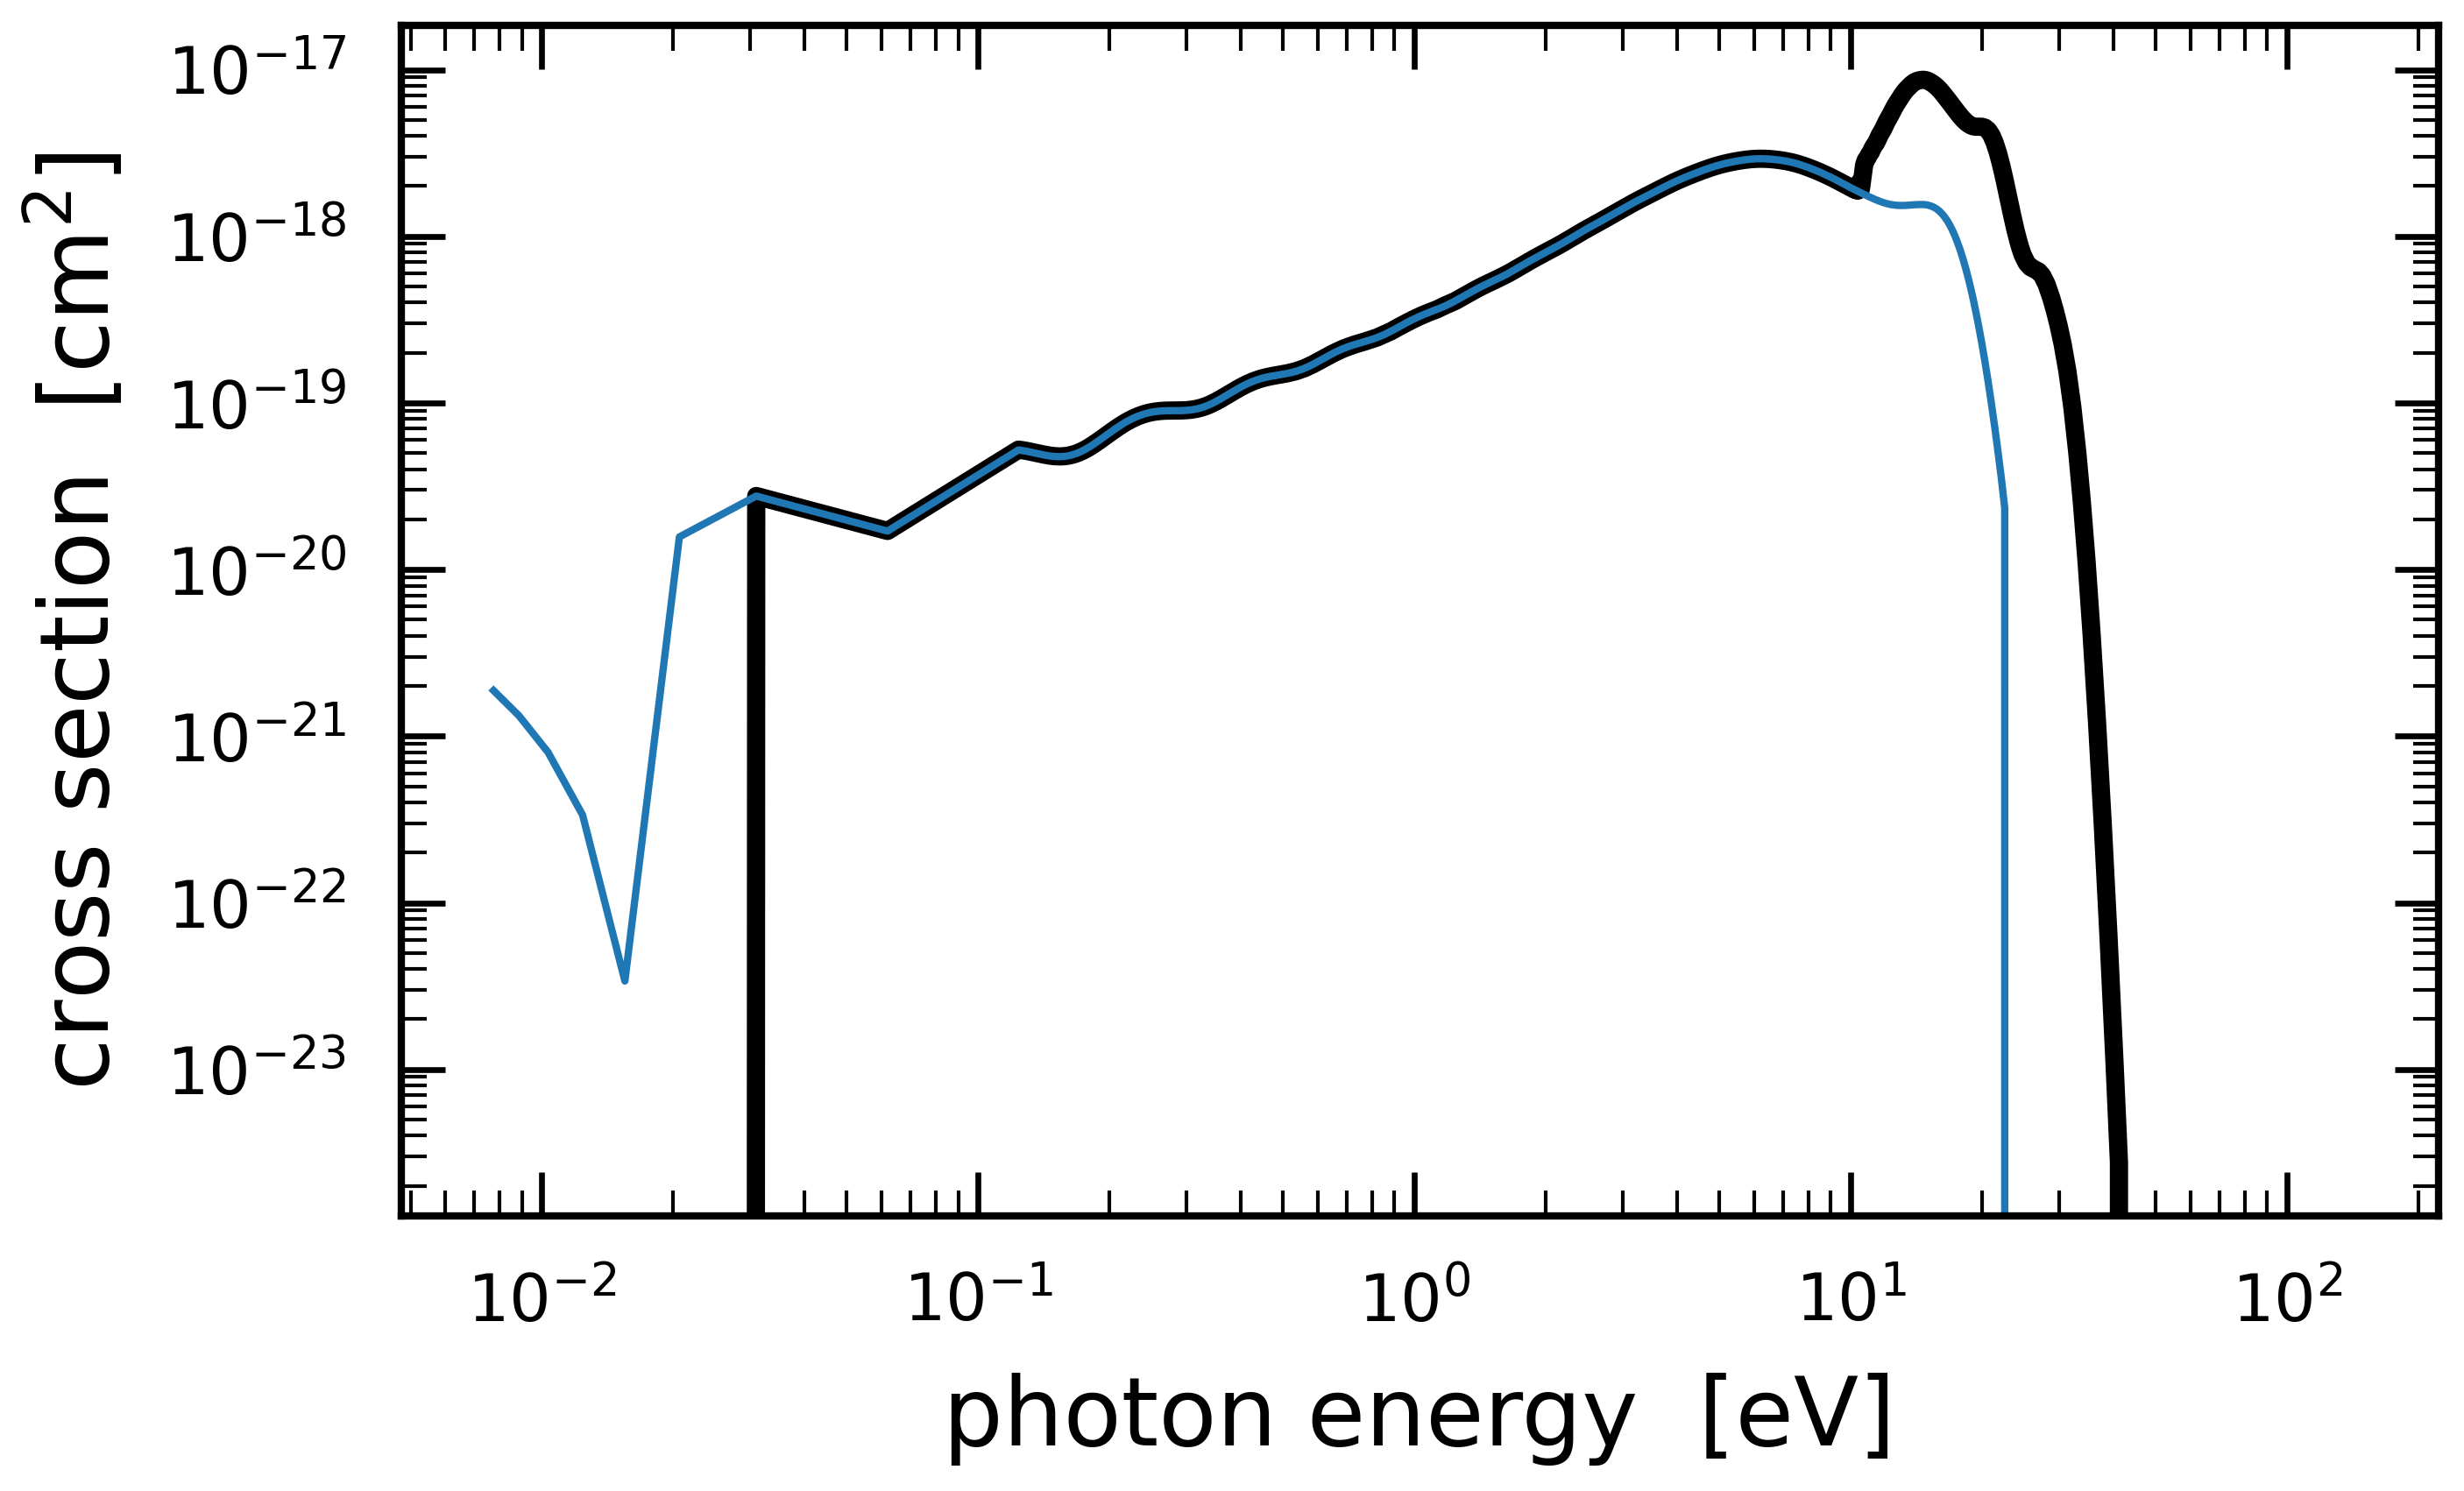

In [7]:
fig, ax = plt.subplots()
ax.plot(energy_SEDs[::-1], zammit_cross_section, lw=5, ls='-', c='k')
ax.plot(energy_SEDs[::-1], babb_cross_section, lw=2, ls='-', c='C0')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel(r'cross section  [cm$^2$]')
# ax.set_xlabel(r'photon wavelength  [$\AA$]')
# ax.set_xlim(left=1e2, right=1e4)
ax.set_xlabel(r'photon energy  [eV]')
# ax.set_xlim(left=1e0, right=1e2)

## integration

In [3]:
from LWphotorates.utils import nu2lambda, spec_nu2lambda, generate_flat_spectrum
from LWphotorates.H2p import calculate_kH2p
from scipy.interpolate import InterpolatedUnivariateSpline

In [7]:
custom_energy_array = np.linspace(start=0.1, stop=13.6, num=int(1e4)) * u.eV
custom_frequency_array = custom_energy_array / const.h.to(u.eV / u.Hz)
custom_wavelength_array = nu2lambda(custom_frequency_array)

# this gives a spherical surface of 1 cm^2
distance_for_tests = np.sqrt(1. / 4. / np.pi) * u.cm

spectrum_freq = generate_flat_spectrum(spectrum_length=len(custom_energy_array)) * 1e-21 * 4. * np.pi * u.sr * u.cm**2
spectrum_wl = spec_nu2lambda(custom_frequency_array, spectrum_freq)



gas_temperature_GS = 1e2 * u.K
gas_density_GS = 1e0 * u.cm**-3

gas_temperature_LTE = 5e3 * u.K
gas_density_LTE = 1e4 * u.cm**-3

In [9]:
H2p_diss_rate_GS_B, H2p_heating_rate_GS_B = calculate_kH2p(
    wavelength_array=custom_wavelength_array,
    spectra_wl=spectrum_wl,
    distance=distance_for_tests.to(u.kpc),
    gas_density=gas_density_GS,
    gas_temperature=gas_temperature_GS,
    cross_section_reference='B_15'
)

H2p_diss_rate_GS_Z, H2p_heating_rate_GS_Z = calculate_kH2p(
    wavelength_array=custom_wavelength_array,
    spectra_wl=spectrum_wl,
    distance=distance_for_tests.to(u.kpc),
    gas_density=gas_density_GS,
    gas_temperature=gas_temperature_GS,
    cross_section_reference='Z_17'
)

H2p_diss_rate_LTE_B, H2p_heating_rate_LTE_B = calculate_kH2p(
    wavelength_array=custom_wavelength_array,
    spectra_wl=spectrum_wl,
    distance=distance_for_tests.to(u.kpc),
    gas_density=gas_density_LTE,
    gas_temperature=gas_temperature_LTE,
    cross_section_reference='B_15'
)

H2p_diss_rate_LTE_Z, H2p_heating_rate_LTE_Z = calculate_kH2p(
    wavelength_array=custom_wavelength_array,
    spectra_wl=spectrum_wl,
    distance=distance_for_tests.to(u.kpc),
    gas_density=gas_density_LTE,
    gas_temperature=gas_temperature_LTE,
    cross_section_reference='Z_17'
)

In [10]:
print('{0: >12}: \t {1}'.format('GS - Babb', H2p_diss_rate_GS_B))
print('{0: >12}: \t {1}'.format('LTE - Babb', H2p_diss_rate_LTE_B))
print('{0: >12}: \t {1}'.format('GS - Zammit', H2p_diss_rate_GS_Z))
print('{0: >12}: \t {1}'.format('LTE - Zammit', H2p_diss_rate_LTE_Z))


print('{0: >12}: \t {1}'.format('GS - Babb', H2p_heating_rate_GS_B))
print('{0: >12}: \t {1}'.format('LTE - Babb', H2p_heating_rate_LTE_B))
print('{0: >12}: \t {1}'.format('GS - Zammit', H2p_heating_rate_GS_Z))
print('{0: >12}: \t {1}'.format('LTE - Zammit', H2p_heating_rate_LTE_Z))

   GS - Babb: 	 5.310313929273745e-12 1 / s
  LTE - Babb: 	 7.951986464405937e-12 1 / s
 GS - Zammit: 	 5.30687768315465e-12 1 / s
LTE - Zammit: 	 9.332344028812605e-12 1 / s
   GS - Babb: 	 4.305813853568239e-11 eV / s
  LTE - Babb: 	 4.14436071996405e-11 eV / s
 GS - Zammit: 	 4.3052105257285375e-11 eV / s
LTE - Zammit: 	 4.425765697303566e-11 eV / s


## final tests

In [2]:
from LWphotorates.H2p import calc_kH2p as old_calc
from LWphotorates.H2p import calculate_kH2p as new_calc
from LWphotorates import compute_H2p_diss_rate as new_wrapper

In [5]:
gas_density_for_tests = 1e0 * u.cm**-3
gas_temperature_for_tests = 1e2 * u.K


test_rates_file_path = os.path.join(os.getcwd(), 'inputdata', 'test_rates', 'test_rates_initial_status.h5')
test_rates_file = h5py.File(test_rates_file_path, 'r')
old_rates = test_rates_file['slug/H2p'][:]


from LWphotorates.utils import lambda2nu

data_example_path = os.path.join(os.getcwd(), 'inputdata', 'example_spectra', 'exampleSlug.txt')
data_example = np.loadtxt(data_example_path)

age_stars_SEDs = np.logspace(6, 9, 61)
wl_SEDs = data_example[0] * u.angstrom
spectra_SEDs = data_example[1:] * u.erg / u.s / u.angstrom

freq_SEDs = lambda2nu(wl_SEDs)
energy_SEDs = const.h.to(u.eV / u.Hz) * freq_SEDs

In [8]:
new_rate, new_heat_rate = new_calc(
    wavelength_array=wl_SEDs,
    spectra_wl=spectra_SEDs,
    distance=1.*u.kpc,
    gas_density=gas_density_for_tests,
    gas_temperature=gas_temperature_for_tests
    )
wrapper_rate, wrapper_heat_rate = new_wrapper(
    wavelength_array=wl_SEDs,
    spectra_wl=spectra_SEDs,
    distance=1.*u.kpc,
    gas_density=gas_density_for_tests,
    gas_temperature=gas_temperature_for_tests
    )

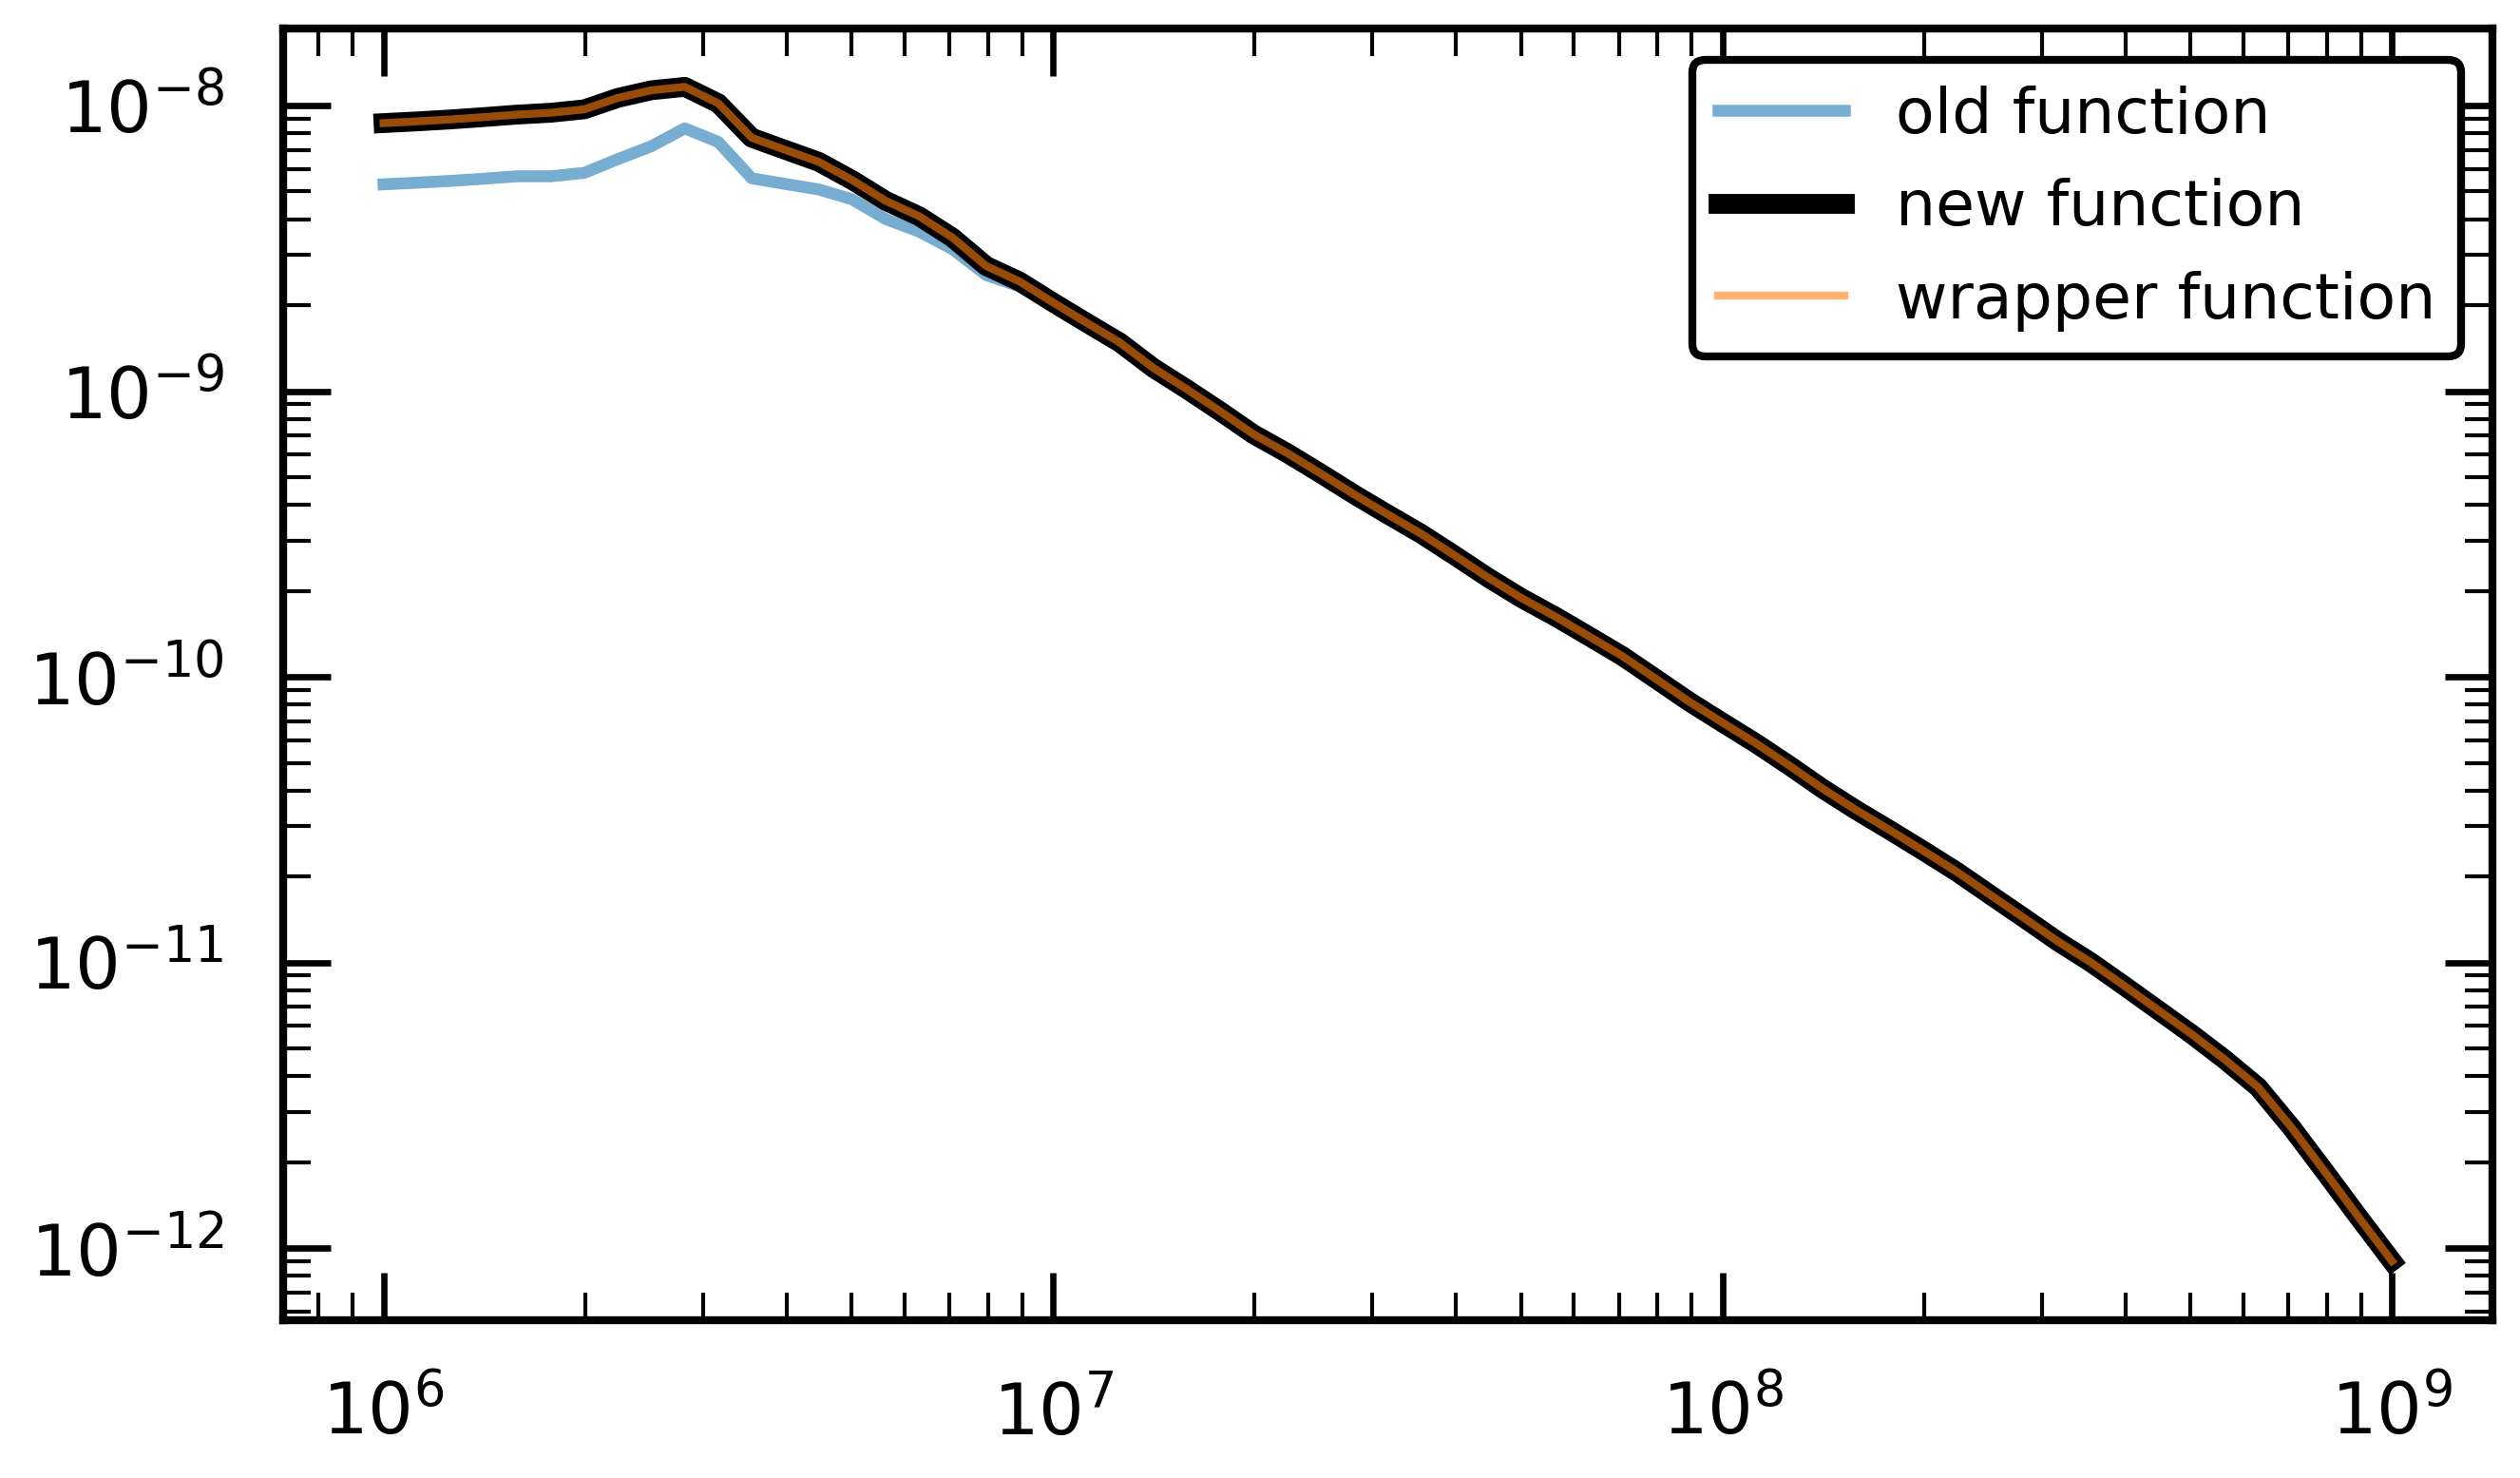

In [12]:
fig, ax = plt.subplots()
ax.plot(age_stars_SEDs, old_rates, lw=3, c='C0', alpha=0.6, label='old function')
ax.plot(age_stars_SEDs, new_rate, lw=5, c='k', label='new function')
ax.plot(age_stars_SEDs, wrapper_rate, lw=2, c='C1', alpha=0.6, label='wrapper function')
ax.set_xscale('log')
ax.set_yscale('log')
legend = ax.legend(ncol=1, loc='best')
legend.get_frame().set_linewidth(2)

In [13]:
test_rates_file.close()

# H2 stuff

## ground state data and partition function

In [28]:
from LWphotorates.utils import convert_energy_cm2k, convert_energy_cm2ev, convert_energy_ev2cm, convert_energy_k2cm
from LWphotorates.H2 import read_Xstates, get_ground_states_data, calculate_partition_function, Xpop

In [7]:
new_ground_states_data = get_ground_states_data()
old_ground_states_data = read_Xstates()

In [8]:
new_partition_function = calculate_partition_function(gas_temperature_for_tests, ground_states_data=new_ground_states_data, normalised=True)
old_partition_function = Xpop(old_ground_states_data, gas_temperature_for_tests)

In [9]:
print(new_ground_states_data.keys())
print(old_ground_states_data.keys())

dict_keys(['v', 'J', 'cm', 'eV', 'K'])
dict_keys(['v', 'J', 'cm', 'eV', 'K'])


In [10]:
# differences here are expected as I inverted 'cm' and 'eV', not differences to (0, 0) anymore, actual values
# only 'K' now is the difference from the ground state

for k in new_ground_states_data.keys():
    print(((new_ground_states_data[k] - old_ground_states_data[k])**2).sum())

0.0
0.0
166413423597.2337 1 / cm2
2558.120703761075 eV2
0.0 K2


In [15]:
print(((new_partition_function - old_partition_function)**2).sum())

0.0


### FRIGUS code

In [2]:
from LWphotorates.H2 import call_to_frigus, Xpop_frigus

In [3]:
gas_temperature_array = np.linspace(100, 500) * u.K

gas_temperature_for_tests = 2e2 * u.K
gas_density_for_tests = 1e10 * u.cm**-3

In [4]:
old_gs_data, old_pf = Xpop_frigus(gas_density_for_tests, gas_temperature_for_tests)
new_gs_data, new_pf = call_to_frigus(gas_density_for_tests, gas_temperature_for_tests)

/home/inca/miniconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [5]:
print(new_gs_data.keys())
print(old_gs_data.keys())

dict_keys(['v', 'J', 'eV', 'cm', 'K'])
dict_keys(['v', 'J', 'eV', 'cm', 'K'])


In [6]:
# differences here are expected as I inverted 'cm' and 'eV', not differences to (0, 0) anymore, actual values
# only 'K' now is the difference from the ground state

for k in new_gs_data.keys():
    print(((new_gs_data[k] - old_gs_data[k])**2).sum())
print(((new_pf - old_pf)**2).sum())

0.0
0.0
4.238855504800002 eV2
275750262.9374099 1 / cm2
5.717885984272804e-23 K2
0.0


In [7]:
def calc_ratio(gas_density, gas_temperature, redshift=15.):
    frigus_ground_states_data, frigus_partition_function = call_to_frigus(gas_density, gas_temperature, redshift)
    para_partition_function = frigus_partition_function[frigus_ground_states_data['J']%2 == 0].sum()
    ortho_partition_function = frigus_partition_function[frigus_ground_states_data['J']%2 == 1].sum()
    ortho_to_para_ratio = ortho_partition_function / para_partition_function
    return ortho_to_para_ratio

In [8]:
ortho_to_para_ratio_z0 = np.array(
    [calc_ratio(gas_density_for_tests, gas_temperature, redshift=0.) for gas_temperature in gas_temperature_array]
    )
ortho_to_para_ratio_z15 = np.array(
    [calc_ratio(gas_density_for_tests, gas_temperature, redshift=15.) for gas_temperature in gas_temperature_array]
    )
ortho_to_para_ratio_z30 = np.array(
    [calc_ratio(gas_density_for_tests, gas_temperature, redshift=30.) for gas_temperature in gas_temperature_array]
    )
ortho_to_para_ratio_z100 = np.array(
    [calc_ratio(gas_density_for_tests, gas_temperature, redshift=100.) for gas_temperature in gas_temperature_array]
    )
ortho_to_para_ratio_z300 = np.array(
    [calc_ratio(gas_density_for_tests, gas_temperature, redshift=300.) for gas_temperature in gas_temperature_array]
    )
ortho_to_para_ratio_z1000 = np.array(
    [calc_ratio(gas_density_for_tests, gas_temperature, redshift=1000.) for gas_temperature in gas_temperature_array]
    )

/home/inca/miniconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/inca/miniconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/inca/miniconda3/lib/python3.8/site-packages/astropy/units/quantity.py:479: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


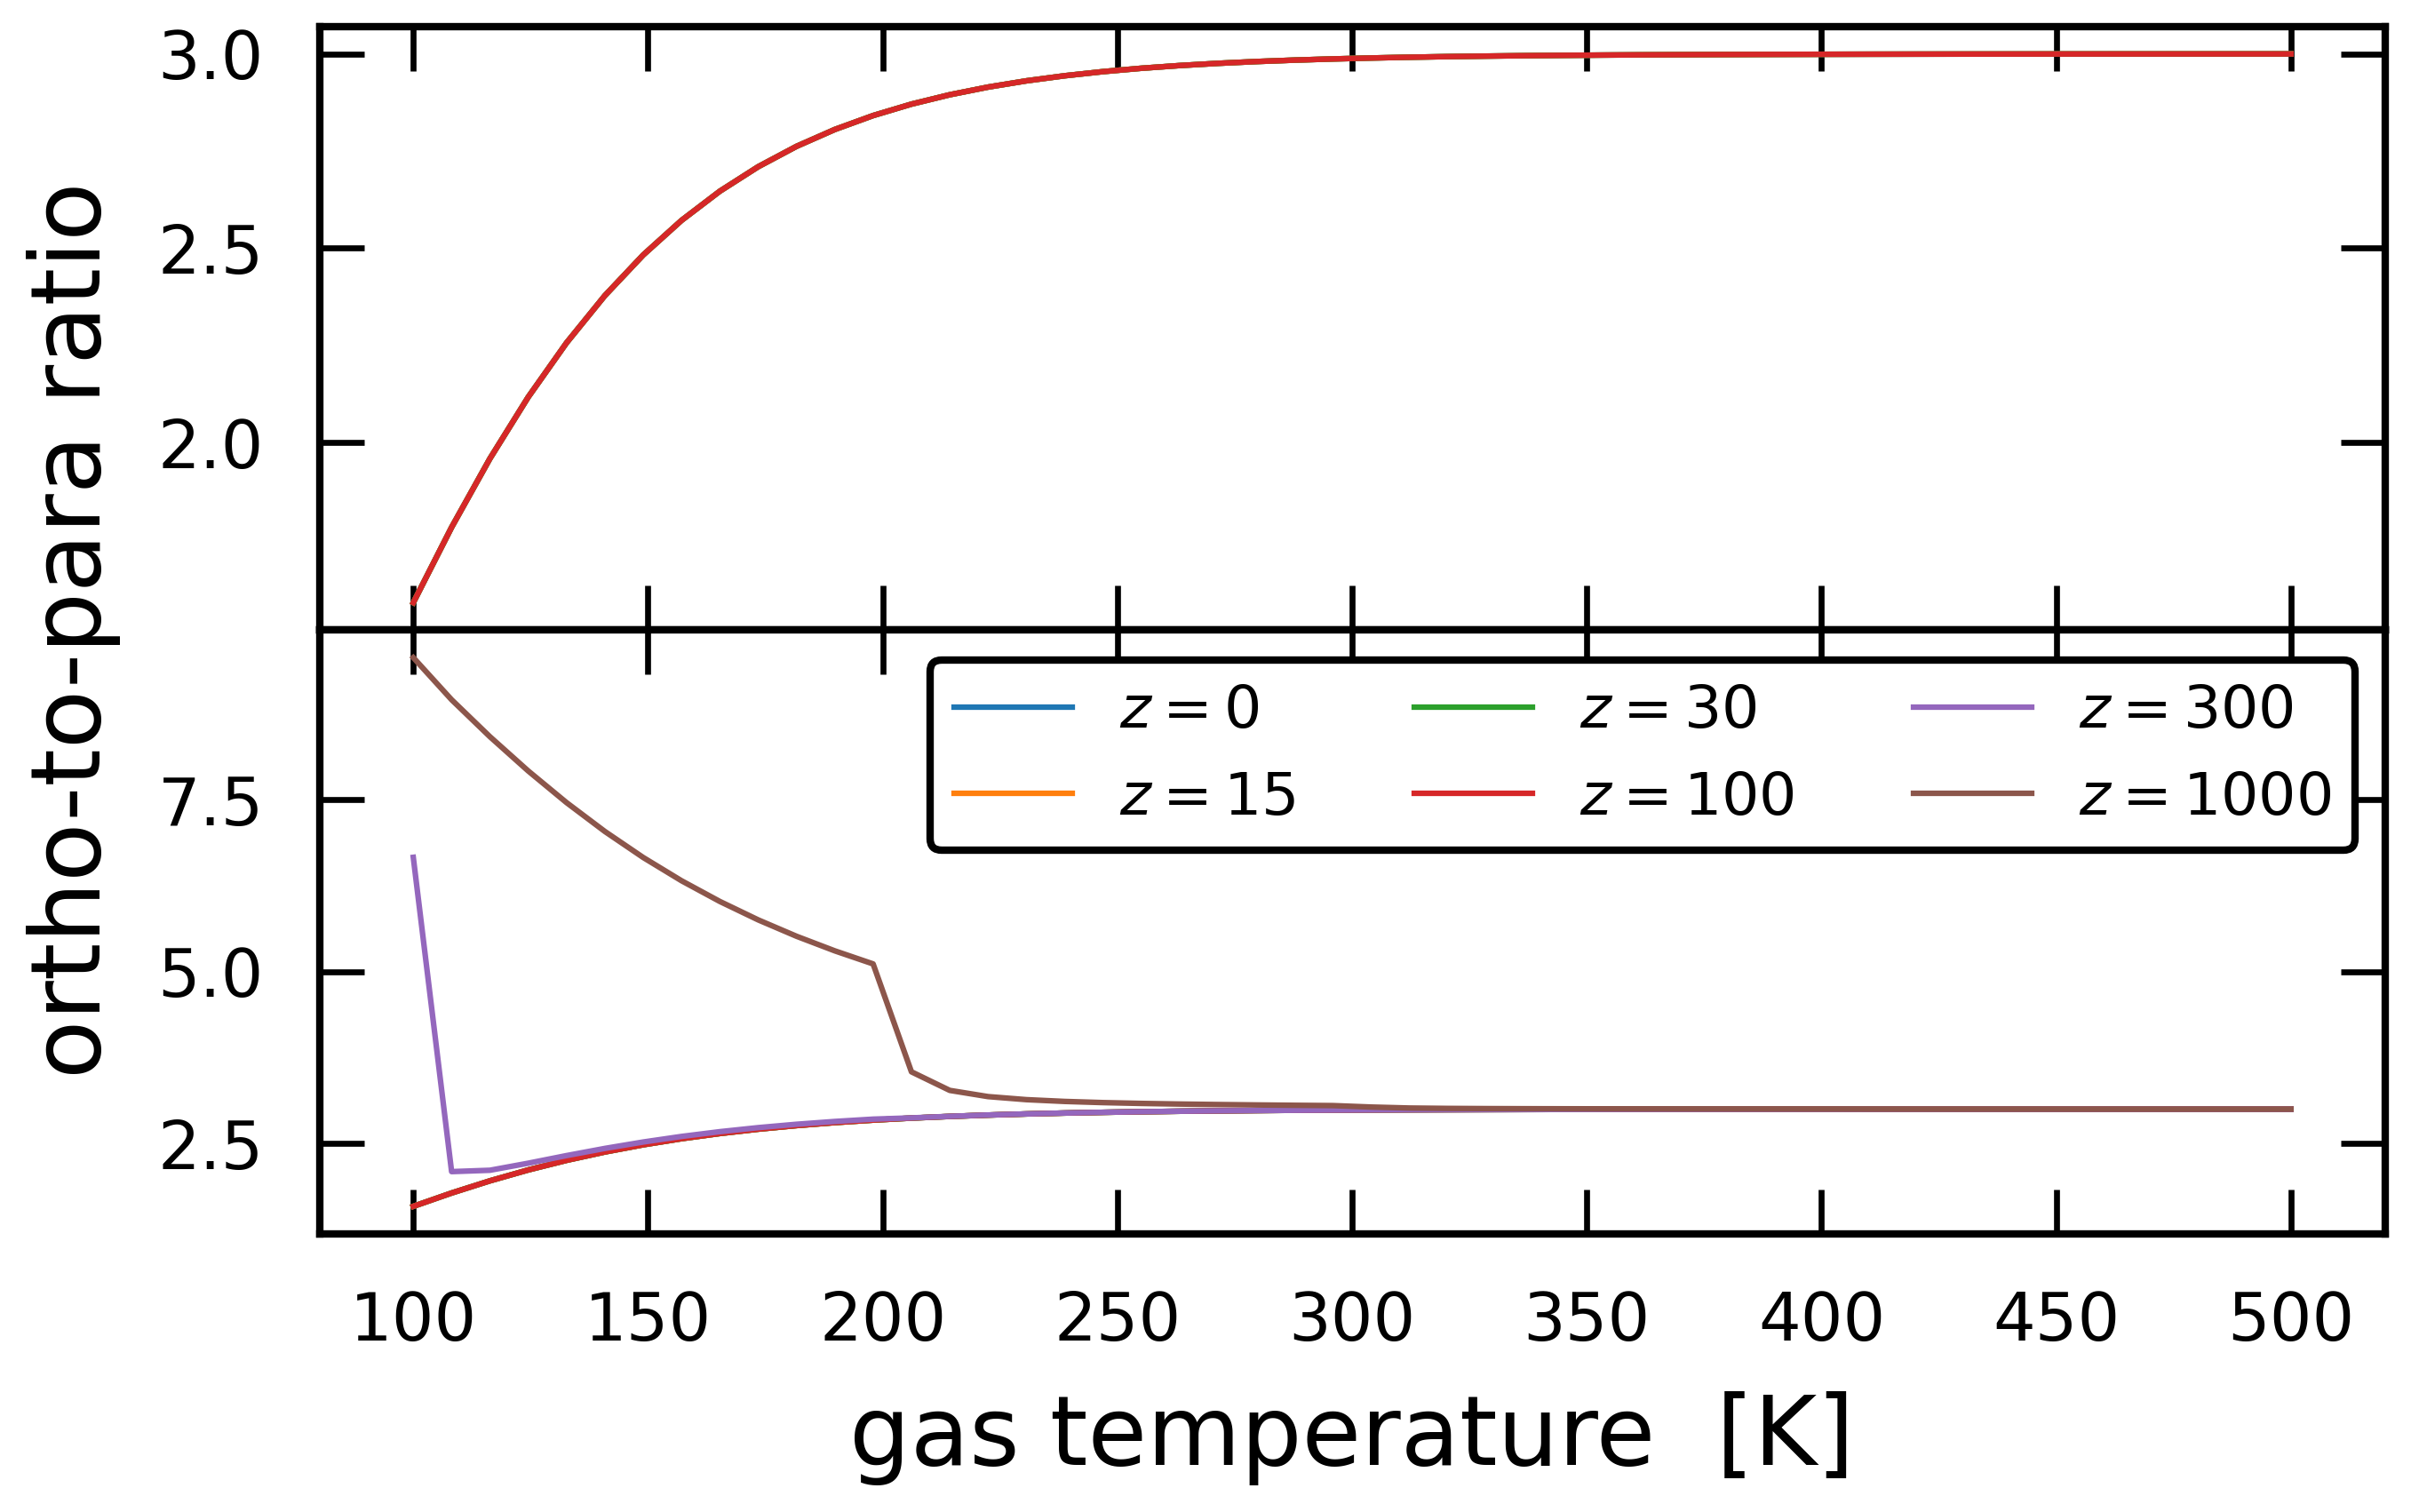

In [10]:
fig, axes = plt.subplots(nrows=2, sharex=True)
ax = axes[0]
ax.plot(gas_temperature_array, ortho_to_para_ratio_z0)
ax.plot(gas_temperature_array, ortho_to_para_ratio_z15)
ax.plot(gas_temperature_array, ortho_to_para_ratio_z30)
ax.plot(gas_temperature_array, ortho_to_para_ratio_z100)
ax = axes[1]
ax.plot(gas_temperature_array, ortho_to_para_ratio_z0, label=r'$z=0$')
ax.plot(gas_temperature_array, ortho_to_para_ratio_z15, label=r'$z=15$')
ax.plot(gas_temperature_array, ortho_to_para_ratio_z30, label=r'$z=30$')
ax.plot(gas_temperature_array, ortho_to_para_ratio_z100, label=r'$z=100$')
ax.plot(gas_temperature_array, ortho_to_para_ratio_z300, label=r'$z=300$')
ax.plot(gas_temperature_array, ortho_to_para_ratio_z1000, label=r'$z=1000$')
ax.set_xlabel('gas temperature  [K]')
ax.set_ylabel('ortho-to-para ratio', y=1)
legend = ax.legend(ncol=3, loc='best')
legend.get_frame().set_linewidth(2)
fig.subplots_adjust(wspace=0, hspace=0)

## LW transitions

In [2]:
from LWphotorates.H2 import get_lw_transitions, read_transitions

In [3]:
lw_transitions_reference = 'A_94'       # 'A_94', 'U_19', 'U_19+S_15'
excited_states_to_use = 'all'            # 'B', 'C', 'LW', 'additional', 'all'

new_lw_transitions = get_lw_transitions(excited_states_to_use, lw_transitions_reference)
old_lw_transitions = read_transitions('A94', excited_states_to_use)

In [4]:
print(new_lw_transitions.keys())
print(old_lw_transitions.keys())

dict_keys(['VL', 'JL', 'VU', 'JU', 'wl', 'f', 'Gamma', 'frac_diss', 'mean_Ekin', 'freq'])
dict_keys(['VL', 'JL', 'VU', 'JU', 'wl', 'f', 'Gamma', 'frac_diss', 'mean_Ekin', 'freq'])


In [5]:
# differences here are expected as I inverted 'cm' and 'eV', not differences to (0, 0) anymore, actual values
# only 'K' now is the difference from the ground state

for k in new_lw_transitions.keys():
    if type(new_lw_transitions[k]) != u.Quantity:
        print(((new_lw_transitions[k] - old_lw_transitions[k])**2).sum())
    else:
        if type(old_lw_transitions[k]) != u.Quantity:
            print(((new_lw_transitions[k].value - old_lw_transitions[k])**2).sum())
        else:
            print(((new_lw_transitions[k] - old_lw_transitions[k])**2).sum())


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0 Hz2


## cross section